### College scorecard data for public colleges in MD, PA, VA
### Considered Community colleges in MD, PA, VA and four-year graduate colleges in MD for comparision analysis

In [4]:
# Import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
BIGGER_SIZE = 14
plt.rc('xtick', labelsize=BIGGER_SIZE)
plt.rc('ytick', labelsize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('legend', fontsize=BIGGER_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

In [5]:
# Read college score card data (https://collegescorecard.ed.gov/data/)
colleges = pd.read_csv("college_data.csv", low_memory=False)


In [6]:
# Check number of rows and columns
colleges.shape

(7112, 1978)

### Drop columns with missing data and not needed for analysis in the below section

In [7]:
# Drop columns with missing data and not needed for analysis
colleges.drop(colleges.loc[:, 'PCIP25':'PCIP42'].columns, axis=1, inplace=True)

In [8]:
colleges.drop(colleges.loc[:, 'PCIP44':'PCIP49'].columns, axis=1, inplace=True)

In [9]:
colleges.drop(colleges.loc[:, 'PCIP54':'DISTANCEONLY'].columns, axis=1, inplace=True)

In [10]:
colleges.drop(colleges.loc[:, 'NPT41_PRIV':'NPT45_PRIV'].columns, axis=1, inplace=True)

In [11]:
colleges.drop(colleges.loc[:, 'NUM41_PRIV':'NUM45_PRIV'].columns, axis=1, inplace=True)

In [12]:
colleges.drop(colleges.loc[:, 'C150_L4_POOLED_SUPP':'DTRANS_L4'].columns, axis=1, inplace=True)

In [13]:
colleges.drop(colleges.loc[:, 'D150_4_WHITE':'D150_L4_HISPOLD'].columns, axis=1, inplace=True)

In [14]:
colleges.drop(colleges.loc[:, 'RET_FT4_POOLED':'RET_PT_DENL4_POOLED'].columns, axis=1, inplace=True)

In [15]:
colleges.drop(colleges.loc[:, 'RET_FT4_POOLED_SUPP':'D150_L4_NOLOANNOPELL'].columns, axis=1, inplace=True)

In [16]:
colleges.drop(colleges.loc[:, 'PRGMOFR':'MTHCMP6'].columns, axis=1, inplace=True)

In [17]:
colleges.drop(colleges.loc[:, 'HI_INC_ENRL_2YR_TRANS_YR2_RT':'DEP_DEATH_YR2_RT'].columns, axis=1, inplace=True)

In [19]:
# Get data for public collges; 
#control of institution; 1 is public, 2 & 3 are for private
pub_coll = colleges[(colleges.CONTROL == 1)]                   
                   

In [20]:
pub_coll.shape

(2076, 1645)

In [37]:
# Extract data for community colleges in MD ( 2 - highest degree awarded is Associate's)
md_comm_coll = pub_coll[(pub_coll.STABBR == 'MD') & (colleges.HIGHDEG == 2)]      

C:\Users\skpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [38]:
print(md_comm_coll.shape)

(16, 1645)


In [ ]:
# Create dataframe with INST, and UGDS columns
md_comm_ugds = md_comm_coll[['INST','UGDS']]


In [23]:
#md_comm_coll.INSTNM

In [39]:
# Abbreviations for MD community collges to be used in gpraphs
INST=['Allegany', 'Anne_Arun', 'Blt_City', 'Cecil', 'Southern_MD', 
      'Chesapeake', 'Frederick', 'Garrett', 'Hagerstwn', 'Har4d', 
      'Howard', 'Montg', 'PG', 'Wor_Wic', 'Carroll', 'Blt_Cnty']

In [40]:
md_comm_coll['INST'] = INST

C:\Users\skpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
# Extract data for four year colleges in MD (4 - Highest degree awarded is Graduate)
md_grad_coll = pub_coll[(pub_coll.STABBR == 'MD') & (colleges.HIGHDEG == 4)]       


C:\Users\skpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [43]:
print(md_grad_coll.shape)


(13, 1645)


In [44]:
#md_grad_coll.INSTNM

In [45]:
# Abbreviations for MD Graduate collges to be used in gpraphs
GINST=['UB', 'Bowie', 'Coppin', 'Frostburg', 'UMUC', 
       'UMB', 'UMBC', 'UMCP', 'UMES', 'Morgan', 
       'Salisbury', 'StMarys', 'Towson']

In [46]:
# Number of undergrads admitted per year in each community collge
md_grad_coll['GINST'] = GINST

C:\Users\skpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
# Number of undergrads admitted per year in each CC in MD
#md_comm_coll[['INST','UGDS']]

In [29]:
#plt.hist([md_comm_coll.UGDS, pa_comm_coll.UGDS, va_comm_coll.UGDS], 
#         color=['orange', 'green', 'purple'], 
#         label=['MD', 'PA', 'VA'])
#plt.legend()
         

In [52]:
# Create a new dataframe with few selected fields for public colleges
pub_coll_sel = pd.DataFrame(columns=['STATE', 'HIGHDEG', 'UGDS', 'FSTGEN%', 'NUM_FINC_30K', 'NUM_FINC_48K', 'NUM_FINC_75K', 
              'COST', 'NET_PRICE', 'NETPRI_30K', 'NETPRI_48K', 'NETPRI_75K', 'FLOAN%', 'PELL%', 
              'MDN_DEBT', 'FSTGEN_DEBT', 'PELL_MDN_DEBT', 'NOPELL_MDN_DEBT', 'MDN_FAMINC', 'FAMINC', 
              'MN_EARN', 'POVERTY_RT', 'UNEMP_RT'])



In [53]:
# Move data for the selected fields into the new dataframe
pub_coll_sel[['STATE', 'HIGHDEG', 'UGDS', 'FSTGEN%', 'NUM_FINC_30K', 'NUM_FINC_48K', 'NUM_FINC_75K', 
              'COST', 'NET_PRICE', 'NETPRI_30K', 'NETPRI_48K', 'NETPRI_75K', 'FLOAN%', 'PELL%', 
              'MDN_DEBT', 'FSTGEN_DEBT', 'PELL_MDN_DEBT', 'NOPELL_MDN_DEBT', 'MDN_FAMINC', 'FAMINC', 
              'MN_EARN', 'POVERTY_RT', 'UNEMP_RT']] = pub_coll[[
    'STABBR', 'HIGHDEG', 'UGDS', 'PAR_ED_PCT_1STGEN', 'NUM41_PUB', 'NUM42_PUB', 'NUM43_PUB',  
    'COSTT4_A', 'NPT4_PUB', 'NPT41_PUB', 'NPT42_PUB', 'NPT43_PUB', 'PCTFLOAN', 'PCTPELL', 
    'GRAD_DEBT_MDN', 'FIRSTGEN_DEBT_MDN', 'PELL_DEBT_MDN', 'NOPELL_DEBT_MDN', 'MD_FAMINC', 'FAMINC', 
    'MN_EARN_WNE_P6', 'POVERTY_RATE', 'UNEMP_RATE']]


In [54]:
# select data for MD, PA, VA community colleges
mdpava_comm = pub_coll_sel[((pub_coll_sel.STATE == 'MD') | (pub_coll_sel.STATE == 'PA') | (pub_coll_sel.STATE == 'VA')) & 
             (pub_coll_sel.HIGHDEG == 2)]
print(mdpava_comm.shape)

(57, 23)


In [55]:
# select undergrad students enrollement from MD, PA, VA community colleges
mdpava_comm_ugds = pd.DataFrame(columns=['STATE', 'UGDS'])
mdpava_comm_ugds[['STATE', 'UGDS']] = mdpava_comm[['STATE','UGDS']]
print(mdpava_comm_ugds.shape)


(57, 2)


In [111]:
# select net price of attendance for students from MD, PA, VA community colleges
mdpava_comm_price = pd.DataFrame(columns=['STATE', 'NET_PRICE'])
mdpava_comm_price[['STATE', 'NET_PRICE']] = mdpava_comm[['STATE','NET_PRICE']]
print(mdpava_comm_price.shape)

(57, 2)


In [114]:
# use melt function on the dataframe before using it to draw pair box plots
mdpava_comm_price = pd.melt(mdpava_comm_price, id_vars = "STATE")
#print(mdpava_comm_price.head(5))

In [112]:
# select median debt for students from MD, PA, VA community colleges
mdpava_comm_debt = pd.DataFrame(columns=['STATE', 'MDN_DEBT'])
mdpava_comm_debt[['STATE', 'MDN_DEBT']] = mdpava_comm[['STATE','MDN_DEBT']]
print(mdpava_comm_debt.shape)

(57, 2)


In [115]:
# use melt function on the dataframe before using it to draw pair box plots
mdpava_comm_debt = pd.melt(mdpava_comm_debt, id_vars = "STATE")
#print(mdpava_comm_debt.head(5))

In [113]:
# select mean earnings for students from MD, PA, VA community colleges
mdpava_comm_earn = pd.DataFrame(columns=['STATE', 'MN_EARN'])
mdpava_comm_earn[['STATE', 'MN_EARN']] = mdpava_comm[['STATE','MN_EARN']]
print(mdpava_comm_earn.shape)

(57, 2)


In [116]:
# use melt function on the dataframe before using it to draw pair box plots
mdpava_comm_earn = pd.melt(mdpava_comm_earn, id_vars = "STATE")
#print(mdpava_comm_earn.head(5))

In [56]:
# use melt function on the dataframe before using it to draw pair box plots
mdpava_comm_ugds = pd.melt(mdpava_comm_ugds, id_vars = "STATE")
print(mdpava_comm_ugds.head(5))

  STATE variable    value
0    MD     UGDS   1990.0
1    MD     UGDS  11294.0
2    MD     UGDS   3797.0
3    MD     UGDS   2112.0
4    MD     UGDS   6699.0


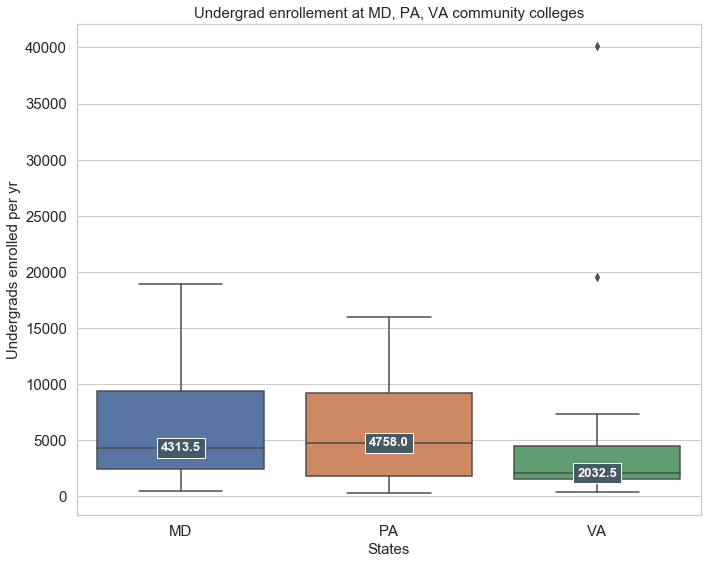

In [189]:
# Comparision box plots for undergrand enrollement in MD, PA, VA community colleges
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid")
box_plot=sns.boxplot(x='STATE', y='value', data=mdpava_comm_ugds)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=13,
        color='white',
        bbox=dict(facecolor='#445A64'))
box_plot.axes.set_title("Undergrad enrollement at MD, PA, VA community colleges",fontsize=15)
box_plot.set_xlabel("States",fontsize=15)
box_plot.set_ylabel("Undergrads enrolled per yr",fontsize=15)
box_plot.tick_params(labelsize=15)
box_plot.figure.tight_layout()
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [751]:
temp=mdpava_comm_ugds.groupby('STATE').value.median().reset_index()
print(temp.transpose())

            0     1       2
STATE      MD    PA      VA
value  4313.5  4758  2032.5


In [744]:
# Summary for number of undergrads enrolled in MD CCs
md_comm_coll.UGDS.describe().transpose()


In [738]:
# Summary for number of undergrads enrolled in MD GCs
md_grad_coll.UGDS.describe().transpose()

count       13.000000
mean     10477.384615
std      12539.734490
min        918.000000
25%       2799.000000
50%       5107.000000
75%      11130.000000
max      42289.000000
Name: UGDS, dtype: float64

In [699]:
md_grad_coll[['GINST', 'UGDS']]

,GINST,UGDS
1453,UB,2856.0
1454,Bowie,5107.0
1460,Coppin,2459.0
1464,Frostburg,4486.0
1476,UMUC,42289.0
1477,UMB,918.0
1478,UMBC,11130.0
1479,UMCP,29273.0
1481,UMES,2799.0
1485,Morgan,6426.0


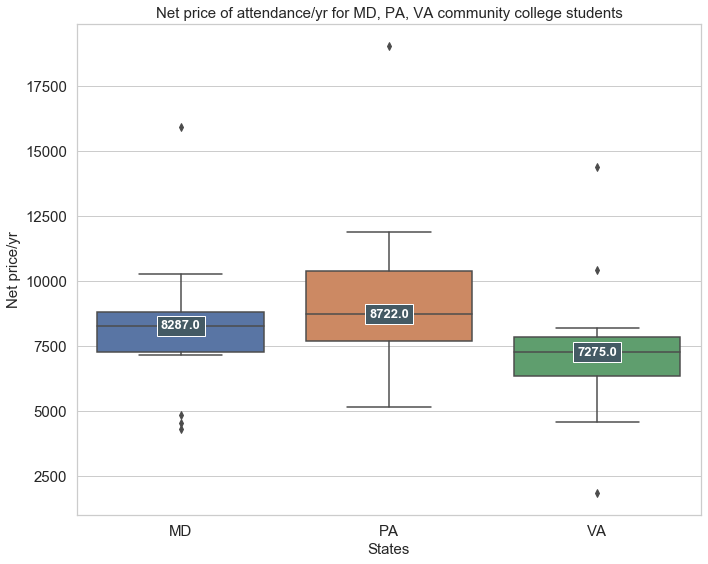

In [167]:
# Comparision box plots for avg net price of attendance for students from MD, PA, VA community colleges
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid")
box_plot=sns.boxplot(x='STATE', y='value', data=mdpava_comm_price)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=13,
        color='white',
        bbox=dict(facecolor='#445A64'))
box_plot.axes.set_title("Net price of attendance/yr for MD, PA, VA community college students",fontsize=15)
box_plot.set_xlabel("States",fontsize=15)
box_plot.set_ylabel("Net price/yr",fontsize=15)
box_plot.tick_params(labelsize=15)
box_plot.figure.tight_layout()
#ax.set(ylim=(0, 19500))

In [752]:
# Median net price to attend at MD, PA, VA CCs
temp=mdpava_comm_price.groupby('STATE').value.median().reset_index()
print(temp.transpose())

          0     1     2
STATE    MD    PA    VA
value  8287  8722  7275


In [125]:
# Move NaN to PrivacySuppressed where required for data analysis and convert them as float64 datatypes
mdpava_comm_debt = mdpava_comm_debt.replace({'value':'PrivacySuppressed'},np.NaN)
mdpava_comm_debt[['value']]=mdpava_comm_debt[['value']].astype('float64')

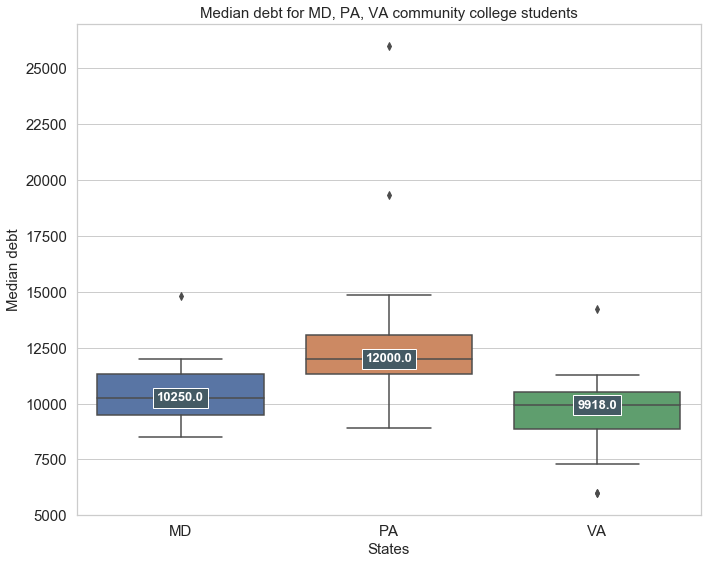

In [168]:
# Comparision box plots for median debt for students from MD, PA, VA community colleges
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid")
box_plot=sns.boxplot(x='STATE', y='value', data=mdpava_comm_debt, whis=1.5)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=13,
        color='white',
        bbox=dict(facecolor='#445A64'))
box_plot.axes.set_title("Median debt for MD, PA, VA community college students",fontsize=15)
box_plot.set_xlabel("States",fontsize=15)
box_plot.set_ylabel("Median debt",fontsize=15)
box_plot.tick_params(labelsize=15)
box_plot.figure.tight_layout()

In [753]:
# Median debt for graduates from MD, PA, VA CCs
temp=mdpava_comm_debt.groupby('STATE').value.median().reset_index()
print(temp.transpose())

           0      1     2
STATE     MD     PA    VA
value  10250  12000  9918


In [127]:
mdpava_comm_earn[['value']]=mdpava_comm_earn[['value']].astype('float64')

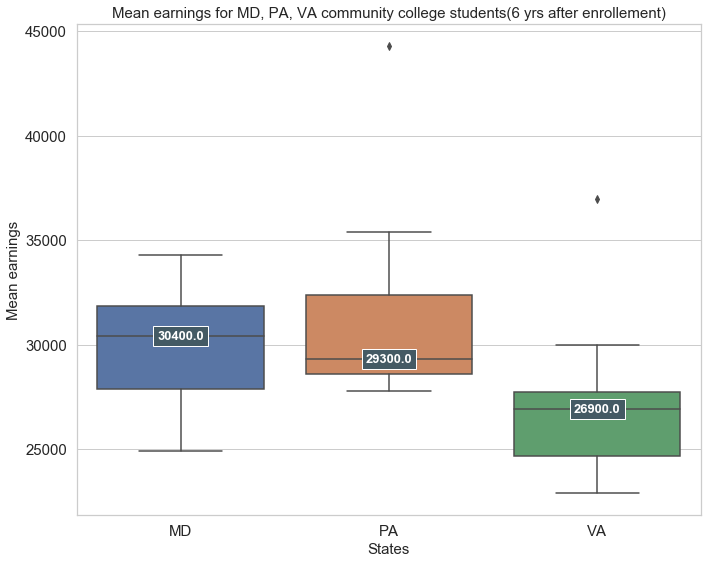

In [169]:
# Comparision box plots for mean earnings for students from MD, PA, VA community colleges
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid")
box_plot=sns.boxplot(x='STATE', y='value', data=mdpava_comm_earn)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=13,
        color='white',
        bbox=dict(facecolor='#445A64'))
box_plot.axes.set_title("Mean earnings for MD, PA, VA community college students(6 yrs after enrollement)",fontsize=15)
box_plot.set_xlabel("States",fontsize=15)
box_plot.set_ylabel("Mean earnings",fontsize=15)
box_plot.tick_params(labelsize=15)
box_plot.figure.tight_layout()

In [754]:
# Median earnings for graduates from MD, PA, VA CCs
temp=mdpava_comm_earn.groupby('STATE').value.median().reset_index()
print(temp.transpose())

           0      1      2
STATE     MD     PA     VA
value  30400  29300  26900


In [170]:
#mdpava_comm[(mdpava_comm.STATE == 'MD')].UGDS.describe()

In [171]:
#mdpava_comm[(mdpava_comm.STATE == 'PA')].UGDS.describe()

In [172]:
#mdpava_comm[(mdpava_comm.STATE == 'VA')].UGDS.describe()

In [173]:
#md_comm_coll.NOPELL_DEBT_MDN

In [102]:
md_comm_coll[['UNEMP_RATE']]=md_comm_coll[['UNEMP_RATE']].astype('float64')

In [93]:
# Correlation for debt with % of federal loan receipients
debt_floan%_corr = md_comm_coll[['GRAD_DEBT_MDN','PCTFLOAN']].corr() 
print(debt_floan%_corr)

               GRAD_DEBT_MDN  PCTFLOAN
GRAD_DEBT_MDN       1.000000  0.728771
PCTFLOAN            0.728771  1.000000


In [709]:
# Correlation for debt with other variables
debt_corr = md_comm_coll[['GRAD_DEBT_MDN','UGDS','PCTPELL','TUITIONFEE_IN','TUITIONFEE_OUT','AVGFACSAL','PCTFLOAN']].corr() 
print(debt_corr)

                GRAD_DEBT_MDN      UGDS   PCTPELL  TUITIONFEE_IN  \
GRAD_DEBT_MDN        1.000000 -0.131608  0.472869       0.227749   
UGDS                -0.131608  1.000000 -0.180581       0.600039   
PCTPELL              0.472869 -0.180581  1.000000      -0.297082   
TUITIONFEE_IN        0.227749  0.600039 -0.297082       1.000000   
TUITIONFEE_OUT      -0.015986  0.732163 -0.227245       0.810490   
AVGFACSAL           -0.313295  0.791770 -0.327158       0.555903   
PCTFLOAN             0.728771 -0.153913  0.397811       0.159880   

                TUITIONFEE_OUT  AVGFACSAL  PCTFLOAN  
GRAD_DEBT_MDN        -0.015986  -0.313295  0.728771  
UGDS                  0.732163   0.791770 -0.153913  
PCTPELL              -0.227245  -0.327158  0.397811  
TUITIONFEE_IN         0.810490   0.555903  0.159880  
TUITIONFEE_OUT        1.000000   0.621739  0.028637  
AVGFACSAL             0.621739   1.000000 -0.354339  
PCTFLOAN              0.028637  -0.354339  1.000000  


In [174]:
#labels=['MD', 'PA', 'VA']
#plt.figure(figsize=(8,8))
#boxes=plt.boxplot([md_comm_coll.UGDS, pa_comm_coll.UGDS, va_comm_coll.UGDS], labels=labels, sym='r.')
#for box in boxes['boxes']:
#    box.set(color='blue')
#plt.title("Undergrad enrollement in MD, PA, VA community colleges")
#plt.xlabel("States")
#plt.ylabel("Number of Undergrads enrolled per yr")
# plt.show()

In [498]:
# Undergrad enrollment for MD CCs
md_comm_ugds=md_comm_coll[['INST', 'UGDS']]

In [499]:
md_comm_ugds=md_comm_ugds.sort_values('UGDS').reset_index()

[Text(0, 0, 'Garrett'),
 Text(0, 0, 'Chesapeake'),
 Text(0, 0, 'Allegany'),
 Text(0, 0, 'Cecil'),
 Text(0, 0, 'Carroll'),
 Text(0, 0, 'Wor_Wic'),
 Text(0, 0, 'Hagerstwn'),
 Text(0, 0, 'Blt_City'),
 Text(0, 0, 'Frederick'),
 Text(0, 0, 'Har4d'),
 Text(0, 0, 'Southern_MD'),
 Text(0, 0, 'Howard'),
 Text(0, 0, 'PG'),
 Text(0, 0, 'Anne_Arun'),
 Text(0, 0, 'Blt_Cnty'),
 Text(0, 0, 'Montg')]

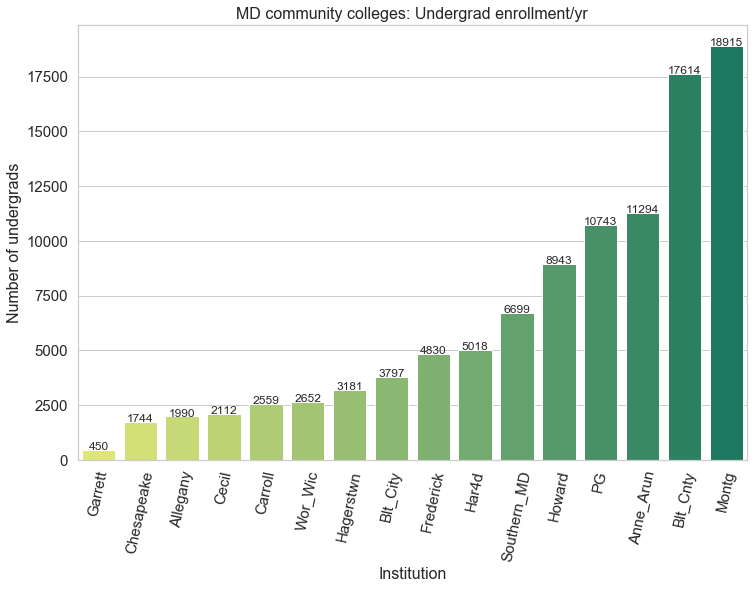

In [729]:
# MD community colleges undergrad enrollment per year
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
ax=sns.barplot(x='INST', y='UGDS', data=md_comm_ugds, palette='summer_r')
for p in ax.patches:
    value = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_y()+p.get_height() + 0.4,
            value,
            ha="center")
ax.axes.set_title("MD community colleges: Undergrad enrollment/yr",fontsize=16)
ax.set_xlabel("Institution",fontsize=16)
ax.set_ylabel("Number of undergrads",fontsize=16)
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=78)

In [502]:
# Undergrad enrollment for MD graduate colleges
md_grad_ugds=md_grad_coll[['GINST', 'UGDS']]

In [503]:
md_grad_ugds=md_grad_ugds.sort_values('UGDS').reset_index()

[Text(0, 0, 'UMB'),
 Text(0, 0, 'StMarys'),
 Text(0, 0, 'Coppin'),
 Text(0, 0, 'UMES'),
 Text(0, 0, 'UB'),
 Text(0, 0, 'Frostburg'),
 Text(0, 0, 'Bowie'),
 Text(0, 0, 'Morgan'),
 Text(0, 0, 'Salisbury'),
 Text(0, 0, 'UMBC'),
 Text(0, 0, 'Towson'),
 Text(0, 0, 'UMCP'),
 Text(0, 0, 'UMUC')]

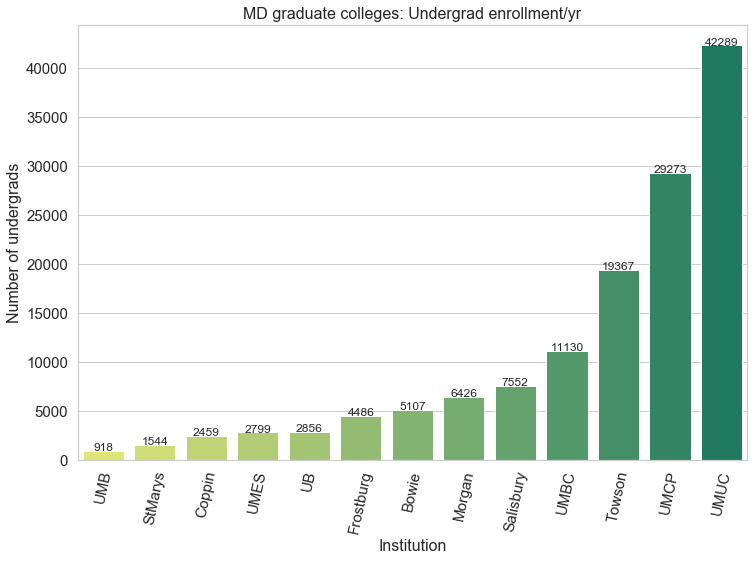

In [728]:
# MD graduate colleges undergrad enrollment per year
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
ax=sns.barplot(x='GINST', y='UGDS', data=md_grad_ugds, palette='summer_r')
for p in ax.patches:
    value = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_y()+p.get_height() + 0.4,
            value,
            ha="center")
ax.axes.set_title("MD graduate colleges: Undergrad enrollment/yr",fontsize=16)
ax.set_xlabel("Institution",fontsize=16)
ax.set_ylabel("Number of undergrads",fontsize=16)
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=78)

In [505]:
md_comm_ugds.UGDS.median()

4313.5

In [506]:
md_grad_ugds.UGDS.median()

5107.0

In [507]:
#md_comm_coll.UGDS.dtype
#sns.set(rc={'figure.figsize':(12,10)})
#sns.set_style("whitegrid")
#md_comm_ugds=sns.countplot(x=md_comm_coll.INST, hue=md_comm_coll.UGDS)
#ax=sns.barplot(x=md_comm_coll.INST, y=md_comm_coll.UGDS)
#for item in ax.get_xticklabels():
#    item.set_rotation(78)
#ax.axes.set_title("MD community colleges: Undergrad enrollment",fontsize=16)
#ax.set_xlabel("Institution",fontsize=16)
#ax.set_ylabel("Number of students",fontsize=16)
#ax.tick_params(labelsize=15)
    

In [175]:
#x = np.arange(16)
#plt.figure(figsize=(10,8))
#plt.title('Undergrad enrollement in MD community colleges')
#plt.xlabel('Institution')
#plt.ylabel('Number of undergrads enrolled per yr')
#plt.bar(x + 0.00, md_comm_coll.UGDS, width=0.15, color='mediumslateblue')
#plt.xticks(x, md_comm_coll.INST, rotation=90)
#plt.show()

In [176]:
# % students who're part-time
#md_comm_coll[['INST','PPTUG_EF']]

In [177]:
#md_comm_coll.PPTUG_EF.describe()

In [178]:
# avg cost of attendance per year: program year institutions
#md_comm_coll[['INST','COSTT4_P']]

In [36]:
# MD community college students: Avg cost of attendance (academic year institutions)
md_comm_coll.COSTT4_A.describe()

count       16.000000
mean     12341.125000
std       2518.855927
min       8599.000000
25%      10762.250000
50%      12574.500000
75%      13191.750000
max      18831.000000
Name: COSTT4_A, dtype: float64

In [ ]:
# MD grad college students: Avg cost of attendance (academic year institutions)
md_grad_coll.COSTT4_A.describe()

In [37]:
# 95% interval for avg cost to attend at MD CCs
confi_interval = np.percentile(md_comm_coll.COSTT4_A, [2.5, 97.5]) 
print(confi_interval)

[ 8868.625 17332.5  ]


In [179]:
# avg price of attendance per year (cost - grants/aid)
#md_comm_coll[['INST','NPT4_PUB']]

In [176]:
# # MD community college students: Avg net price of attendance
md_comm_coll.NPT4_PUB.describe()

count       16.000000
mean      8204.625000
std       2704.560614
min       4334.000000
25%       7275.250000
50%       8287.000000
75%       8803.750000
max      15912.000000
Name: NPT4_PUB, dtype: float64

In [ ]:
# # MD community college students: Avg net price of attendance
md_grad_coll.NPT4_PUB.describe()

In [40]:
# 95% interval for net price to attend at MD CCs
confi_interval = np.percentile(md_comm_coll.NPT4_PUB, [2.5, 97.5]) 
print(confi_interval)

[ 4412.375 13795.875]


In [417]:
# Calculate avg aid/grant at MD CCs
AID_GRANT = md_comm_coll.COSTT4_A - md_comm_coll.NPT4_PUB

In [418]:
#AID_GRANT

In [419]:
# Add new column AID_GRANT to the dataframe
md_comm_coll['AID_GRANT'] = AID_GRANT

In [420]:
#md_comm_coll.shape

In [421]:
md_comm_coll[['INST','AID_GRANT']]

,INST,AID_GRANT
1447,Allegany,4706.0
1448,Anne_Arun,2919.0
1452,Blt_City,4995.0
1456,Cecil,3606.0
1457,Southern_MD,4151.0
1458,Chesapeake,4984.0
1463,Frederick,3889.0
1465,Garrett,4669.0
1468,Hagerstwn,3026.0
1469,Har4d,3550.0


In [46]:
md_comm_coll.AID_GRANT.describe()

count      16.00000
mean     4136.50000
std       661.21101
min      2919.00000
25%      3702.75000
50%      4135.50000
75%      4678.25000
max      4995.00000
Name: AID_GRANT, dtype: float64

In [47]:
# 95% interval for aid/grant at MD CCs
confi_interval = np.percentile(md_comm_coll.AID_GRANT, [2.5, 97.5]) 
print(confi_interval)

[2959.125 4992.   ]


In [182]:
#x = np.arange(16)
#plt.figure(figsize=(10,8))
#plt.title('Total Aid and/or Grant received per student in a year (in dollars)')
#plt.xlabel('Institution')
#plt.ylabel('Avg Aid/Grant')
#plt.bar(x + 0.00, md_comm_coll.AID_GRANT, width=0.15, color='turquoise')
#plt.xticks(x, md_comm_coll.INST, rotation=90)
#plt.show()

In [183]:
# % of students receiving federal student loans
#md_comm_coll[['INST','PCTFLOAN']]

In [50]:
# MD community coll students: Percent of all undergraduate students receiving a federal student loan
# Rounded to four decimal places i.e. 0.1234 is equal to 12.34%
md_comm_coll.PCTFLOAN.describe()

count    16.000000
mean      0.156175
std       0.115030
min       0.000000
25%       0.102750
50%       0.118800
75%       0.194850
max       0.417400
Name: PCTFLOAN, dtype: float64

In [51]:
confi_interval = np.percentile(md_comm_coll.PCTFLOAN, [2.5, 97.5]) # 95% interval 
print(confi_interval)

[0.        0.4016125]


In [ ]:
# MD grad coll students: Percent of all undergraduate students receiving a federal student loan
# Rounded to four decimal places i.e. 0.1234 is equal to 12.34%
md_grad_coll.PCTFLOAN.describe()

In [184]:
# % of students who receive pell grant
#md_comm_coll[['INST','PCTPELL']]

In [53]:
# MD community coll students: Percentage of undergraduates who receive a Pell Grant
md_comm_coll.PCTPELL.describe()

count    16.000000
mean      0.332863
std       0.103728
min       0.191600
25%       0.225400
50%       0.321300
75%       0.419575
max       0.514600
Name: PCTPELL, dtype: float64

In [54]:
confi_interval = np.percentile(md_comm_coll.PCTPELL, [2.5, 97.5]) # The middle 95% interval
print(confi_interval)

[0.1964375 0.497425 ]


In [ ]:
# MD grad coll students: Percentage of undergraduates who receive a Pell Grant
md_grad_coll.PCTPELL.describe()

In [185]:
#undergrads_with_pell_grant_or_federal_student_loan
#md_comm_coll[['INST','D_PCTPELL_PCTFLOAN']]

In [77]:
md_comm_coll.PCTPELL.dtype

dtype('float64')

In [80]:
md_comm_coll[['PCTPELL']]=md_comm_coll[['PCTPELL']].astype('float64')

C:\Users\skpan\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [81]:
md_comm_coll[['PCTFLOAN']]=md_comm_coll[['PCTFLOAN']].astype('float64')

In [186]:
#md_comm_coll.PCTFLOAN

In [ ]:
md_comm_coll.PCTFLOAN.describe()

In [187]:
#sns.set(rc={'figure.figsize':(14,8)})
#md_comm_ugds=sns.countplot(x=md_comm_coll.INST, hue=md_comm_coll.UGDS)
#md_comm_floan=sns.relplot(x=md_comm_coll.INST, y=md_comm_coll.PCTFLOAN)
#sns.scatterplot(x=md_comm_coll.INST, y=md_comm_coll.PCTPELL)
#for item in md_comm_pell.get_xticklabels():
#    item.set_rotation(90)

In [190]:
print(md_comm_coll.PCTFLOAN.dtype)
print(md_comm_coll.PCTPELL.dtype)

float64
float64


In [192]:
md_comm_floanpell = pd.DataFrame(columns=['NAME', 'FED_LOAN%', 'PELL%'])
md_comm_floanpell[['NAME', 'FED_LOAN%', 'PELL%']] = md_comm_coll[['INST','PCTFLOAN', 'PCTPELL']]
print(md_comm_floanpell.shape)

(16, 3)


In [193]:
md_comm_floanpell = pd.melt(md_comm_floanpell, id_vars = "NAME")
#print(md_comm_floanpell.head(5))

In [537]:
md_comm_floanpell=md_comm_floanpell.sort_values('value').reset_index()

In [195]:
print(md_comm_floanpell.head(5))

          NAME   variable   value
0     Allegany  FED_LOAN%  0.4174
1    Anne_Arun  FED_LOAN%  0.1023
2     Blt_City  FED_LOAN%  0.0000
3        Cecil  FED_LOAN%  0.1807
4  Southern_MD  FED_LOAN%  0.1029


In [208]:
#sns.set(rc={'figure.figsize':(14,8)})
#ax = sns.scatterplot(x='NAME', y='value', hue='variable', data=md_comm_floanpell,s=200)
#for item in ax.get_xticklabels():
#    item.set_rotation(90)
#ax.axes.set_title("% of MD community college students receiving Federal student loans over Pell grants",fontsize=16)
#ax.set_xlabel("Institution",fontsize=16)
#ax.set_ylabel("% of students",fontsize=16)
#ax.tick_params(labelsize=15)

[Text(0, 0, 'Blt_City'),
 Text(0, 0, 'Chesapeake'),
 Text(0, 0, 'Har4d'),
 Text(0, 0, 'Anne_Arun'),
 Text(0, 0, 'Southern_MD'),
 Text(0, 0, 'Frederick'),
 Text(0, 0, 'Carroll'),
 Text(0, 0, 'Howard'),
 Text(0, 0, 'Montg'),
 Text(0, 0, 'Wor_Wic'),
 Text(0, 0, 'Cecil'),
 Text(0, 0, 'Blt_Cnty'),
 Text(0, 0, 'PG'),
 Text(0, 0, 'Hagerstwn'),
 Text(0, 0, 'Garrett'),
 Text(0, 0, 'Allegany')]

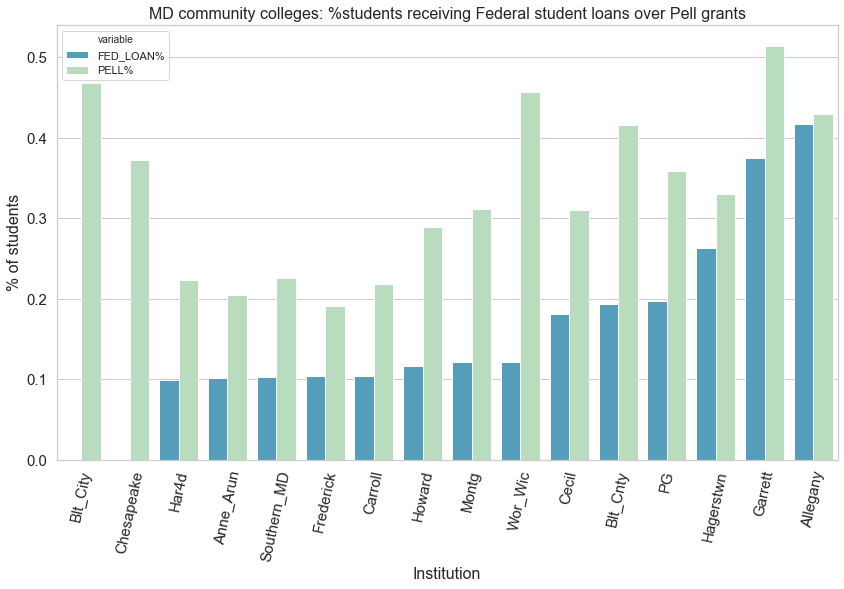

In [548]:
# Plot % of stu receiving federal student loans vs pell grants at MD CCs
sns.set(rc={'figure.figsize':(14,8)})
sns.set_style("whitegrid")
ax=sns.barplot(x='NAME', y='value', hue='variable', data=md_comm_floanpell,palette='GnBu_r')
ax.axes.set_title("MD community colleges: %students receiving Federal student loans over Pell grants",fontsize=16)
ax.set_xlabel("Institution",fontsize=16)
ax.set_ylabel("% of students",fontsize=16)
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=78)

In [217]:
#md_grad_coll.GINST

In [218]:
md_grad_floanpell = pd.DataFrame(columns=['NAME', 'FED_LOAN%', 'PELL%'])
md_grad_floanpell[['NAME', 'FED_LOAN%', 'PELL%']] = md_grad_coll[['GINST','PCTFLOAN', 'PCTPELL']]
print(md_grad_floanpell.shape)

(13, 3)


In [219]:
md_grad_floanpell = pd.melt(md_grad_floanpell, id_vars = "NAME")

In [539]:
md_grad_floanpell=md_grad_floanpell.sort_values('value').reset_index()

[Text(0, 0, 'UMCP'),
 Text(0, 0, 'UMB'),
 Text(0, 0, 'StMarys'),
 Text(0, 0, 'UMUC'),
 Text(0, 0, 'Salisbury'),
 Text(0, 0, 'Towson'),
 Text(0, 0, 'UMBC'),
 Text(0, 0, 'Frostburg'),
 Text(0, 0, 'UB'),
 Text(0, 0, 'Bowie'),
 Text(0, 0, 'Morgan'),
 Text(0, 0, 'UMES'),
 Text(0, 0, 'Coppin')]

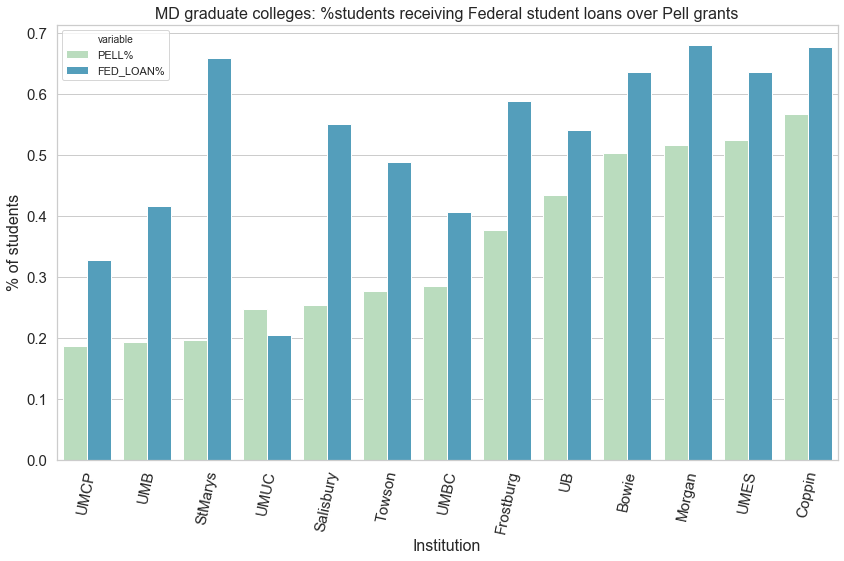

In [558]:
# # Plot % of stu receiving federal student loans vs pell grants at MD GCs
sns.set(rc={'figure.figsize':(14,8)})
sns.set_style("whitegrid")
ax=sns.barplot(x='NAME', y='value', hue='variable', data=md_grad_floanpell, palette='GnBu')
ax.axes.set_title("MD graduate colleges: %students receiving Federal student loans over Pell grants",fontsize=16)
ax.set_xlabel("Institution",fontsize=16)
ax.set_ylabel("% of students",fontsize=16)
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=78)

In [547]:
# median values at MD CCs
md_comm_floanpell.groupby('variable').value.median()

variable
FED_LOAN%    0.1188
PELL%        0.3213
Name: value, dtype: float64

In [546]:
# median values at MD GCs
md_grad_floanpell.groupby('variable').value.median()


variable
FED_LOAN%    0.5497
PELL%        0.2847
Name: value, dtype: float64

In [196]:
#plt.figure(figsize=(20,6))
#plt.title('Students receving Federal student loans vs. Pell grants')
#plt.xlabel('Institution')
#plt.ylabel('percentage')
#plt.scatter(md_comm_coll.INST, md_comm_coll.PCTFLOAN, color='blue', s=30, label='Federal loan')
#plt.plot(md_comm_coll.CITY, md_comm_coll.PCTPELL,'r.', s=12)
#plt.scatter(md_comm_coll.INST, md_comm_coll.PCTPELL, color='red', s=30, label='Pell grant')
#plt.xticks(rotation=90)
#plt.legend()
#plt.show()

In [107]:
#plt.figure(figsize=(20,10))
#plt.title('Number of UGDS VS. those with federal student loans or Pell grants')
#plt.xlabel('Institution Name')
#plt.ylabel('Number of Undergrads')
#plt.scatter(md_comm_coll.INST, md_comm_coll.UGDS, color='blue', s=30, label='# UGDS')
#plt.scatter(md_comm_coll.INST, md_comm_coll.D_PCTPELL_PCTFLOAN, color='red', s=30, label='# Federal loan + Pell grant')
#plt.xticks(rotation=90)
#plt.legend()
#plt.show()

In [102]:
#x = np.arange(16)
#plt.figure(figsize=(20,10))
#plt.bar(x + 0.00, md_comm_coll.UGDS, width=0.25, color='blue', label='UGDS')
#plt.bar(x + 0.25, md_comm_coll.D_PCTPELL_PCTFLOAN, width=0.25, color='red', label='Federal loan + Pell grant')
#plt.xticks(x, md_comm_coll.INST, rotation=90)
#plt.legend()
#plt.show()


In [222]:
# Avg cost and Net price to attend at MD CCs
md_comm_costnpt = pd.DataFrame(columns=['NAME', 'COST', 'NET_PRICE'])
md_comm_costnpt[['NAME', 'COST', 'NET_PRICE']] = md_comm_coll[['INST','COSTT4_A', 'NPT4_PUB']]
#print(md_comm_costnpt.shape)
#print(md_comm_costnpt.COST.dtype)
#print(md_comm_costnpt.NET_PRICE.dtype)

In [223]:
md_comm_costnpt = pd.melt(md_comm_costnpt, id_vars = "NAME")
#print(md_comm_costnpt.head(5))

In [550]:
md_comm_costnpt=md_comm_costnpt.sort_values('value').reset_index()

[Text(0, 0, 'Chesapeake'),
 Text(0, 0, 'Blt_City'),
 Text(0, 0, 'Carroll'),
 Text(0, 0, 'Cecil'),
 Text(0, 0, 'Frederick'),
 Text(0, 0, 'Hagerstwn'),
 Text(0, 0, 'Har4d'),
 Text(0, 0, 'Garrett'),
 Text(0, 0, 'Southern_MD'),
 Text(0, 0, 'PG'),
 Text(0, 0, 'Montg'),
 Text(0, 0, 'Blt_Cnty'),
 Text(0, 0, 'Wor_Wic'),
 Text(0, 0, 'Allegany'),
 Text(0, 0, 'Howard'),
 Text(0, 0, 'Anne_Arun')]

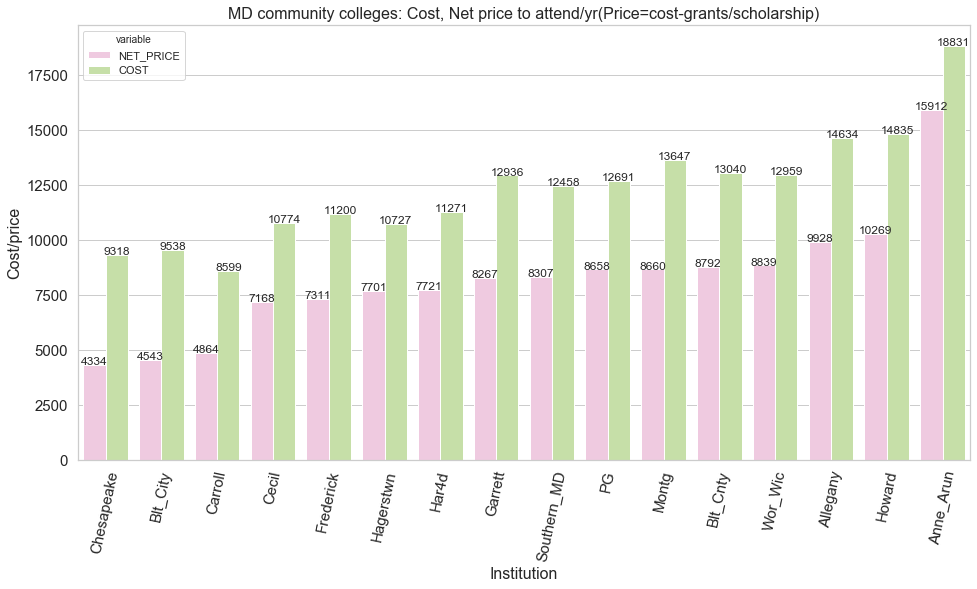

In [560]:
# plot cost vs Net price to attend at MD CCs
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
ax=sns.barplot(x='NAME', y='value', hue='variable', data=md_comm_costnpt, palette='PiYG')
for p in ax.patches:
    value = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_y()+p.get_height() + 0.2,
            value,
            ha="center")
ax.axes.set_title("MD community colleges: Cost, Net price to attend/yr(Price=cost-grants/scholarship)",fontsize=16)
ax.set_xlabel("Institution",fontsize=16)
ax.set_ylabel("Cost/price",fontsize=16)
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=78)

In [226]:
#x = np.arange(16)
#plt.figure(figsize=(20,10))
#plt.title('Avg cost per year VS. Net price (cost-avg grants/scholarship aid)')
#plt.xlabel('Institution')
#plt.ylabel('price')
#plt.bar(x + 0.00, md_comm_coll.COSTT4_A, width=0.25, color='red', label='Avg cost')
#plt.bar(x + 0.25, md_comm_coll.NPT4_PUB, width=0.25, color='green', label='Avg net price')
#plt.xticks(x, md_comm_coll.INST, rotation=90)
#plt.legend()
#plt.show()


In [510]:
print(md_comm_coll.NPT41_PUB.dtype)
print(md_comm_coll.NPT42_PUB.dtype)
print(md_comm_coll.NPT43_PUB.dtype)

float64
float64
float64


In [511]:
# Net price to attend based on family income level at MD CCs
md_comm_pricefinc=pd.DataFrame(columns=['NAME', 'FINC_30K', 'FINC_30TO48K','FINC_48TO75K'])
md_comm_pricefinc[['NAME', 'FINC_30K', 'FINC_30TO48K','FINC_48TO75K']]=md_comm_coll[['INST','NPT41_PUB','NPT42_PUB','NPT43_PUB']]

In [512]:
md_comm_pricefinc = pd.melt(md_comm_pricefinc, id_vars = "NAME")

In [513]:
md_comm_pricefinc = md_comm_pricefinc.sort_values('value').reset_index()

[Text(0, 0, 'Carroll'),
 Text(0, 0, 'Chesapeake'),
 Text(0, 0, 'Blt_City'),
 Text(0, 0, 'Frederick'),
 Text(0, 0, 'Cecil'),
 Text(0, 0, 'Hagerstwn'),
 Text(0, 0, 'Har4d'),
 Text(0, 0, 'Southern_MD'),
 Text(0, 0, 'Garrett'),
 Text(0, 0, 'PG'),
 Text(0, 0, 'Montg'),
 Text(0, 0, 'Blt_Cnty'),
 Text(0, 0, 'Wor_Wic'),
 Text(0, 0, 'Allegany'),
 Text(0, 0, 'Howard'),
 Text(0, 0, 'Anne_Arun')]

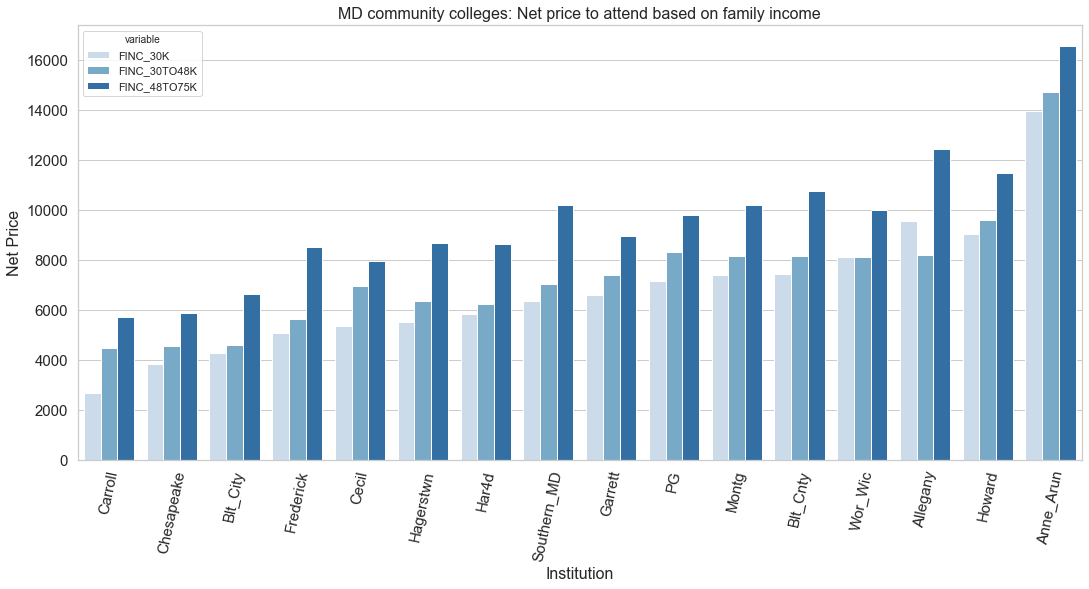

In [534]:
# Plot Net price to attend at MD community colleges based on family income
sns.set(rc={'figure.figsize':(18,8)})
sns.set_style("whitegrid")
ax=sns.barplot(x='NAME', y='value', hue='variable', data=md_comm_pricefinc, palette='Blues')
ax.axes.set_title("MD community colleges: Net price to attend based on family income",fontsize=16)
ax.set_xlabel("Institution",fontsize=16)
ax.set_ylabel("Net Price",fontsize=16)
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=78)

In [780]:
# Medians for Net price based on family income levels at MD CCs
temp=md_comm_coll[['NPT41_PUB','NPT42_PUB','NPT43_PUB','NPT44_PUB']].median().reset_index()
temp.index=['$0-$30k','$30k-$48k','$48k-$75k','$75k-$110k']
print(temp.transpose())

         $0-$30k  $30k-$48k  $48k-$75k $75k-$110k
index  NPT41_PUB  NPT42_PUB  NPT43_PUB  NPT44_PUB
0         6475.5       7217     9379.5      11147


In [772]:
temp=md_grad_coll[['NPT41_PUB','NPT42_PUB','NPT43_PUB','NPT44_PUB']].median().reset_index()
temp.index=['$0-$30k','$30k-$48k','$48k-$75k','$75k-$110k']
print(temp.transpose())

         $0-$30k  $30k-$48k  $48k-$75k $75k-$110k
index  NPT41_PUB  NPT42_PUB  NPT43_PUB  NPT44_PUB
0          11487      14441      17271      20608


In [700]:
#BIGGER_SIZE = 18
#plt.rc('xtick', labelsize=BIGGER_SIZE)
#plt.rc('ytick', labelsize=BIGGER_SIZE)
#plt.rc('axes', labelsize=BIGGER_SIZE)
#plt.rc('axes', titlesize=BIGGER_SIZE)
#plt.rc('legend', fontsize=BIGGER_SIZE)
#plt.rc('figure', titlesize=BIGGER_SIZE)
#x = np.arange(16)
#plt.figure(figsize=(26,10))
#plt.title('Net price based on family income level')
#plt.xlabel('Institution')
#plt.ylabel('price')
#plt.bar(x + 0.00, md_comm_coll.NPT41_PUB, width=0.2, color='brown', label='$0-$30,000')
#plt.bar(x + 0.2, md_comm_coll.NPT42_PUB, width=0.2, color='green', label='$30,001-$48,000')
#plt.bar(x + 0.4, md_comm_coll.NPT43_PUB, width=0.2, color='orange', label='$48,001-$75,000')
#plt.bar(x + 0.6, md_comm_coll.NPT44_PUB, width=0.2, color='mediumslateblue', label='$75,001-$110,000')
#plt.bar(x + 0.8, md_comm_coll.NPT45_PUB, width=0.2, color='purple', label='$110,000+')
#plt.xticks(x, md_comm_coll.INST, rotation=78)
#plt.legend()
#plt.show()

In [61]:
# Median debt for students who've completed
#md_comm_coll[['INST','GRAD_DEBT_MDN']]

,INST,GRAD_DEBT_MDN
1447,Allegany,14813
1448,Anne_Arun,10000
1452,Blt_City,PrivacySuppressed
1456,Cecil,9875
1457,Southern_MD,9234
1458,Chesapeake,PrivacySuppressed
1463,Frederick,8599
1465,Garrett,11500
1468,Hagerstwn,11000
1469,Har4d,8500


In [189]:
#md_comm_coll.GRAD_DEBT_MDN.isnull()

In [191]:
#md_comm_coll.GRAD_DEBT_MDN.value_counts()

In [107]:
# Replace "PrivacySupressed" values with NaN for convenience 
md_comm_coll = md_comm_coll.replace({'GRAD_DEBT_MDN':'PrivacySuppressed'},np.NaN)
md_comm_coll = md_comm_coll.replace({'PELL_DEBT_MDN':'PrivacySuppressed'},np.NaN)
md_comm_coll = md_comm_coll.replace({'NOPELL_DEBT_MDN':'PrivacySuppressed'},np.NaN)

In [130]:
#md_comm_coll[['INST','GRAD_DEBT_MDN']]

In [195]:
#md_comm_coll.GRAD_DEBT_MDN.value_counts()

In [108]:
md_comm_coll[['GRAD_DEBT_MDN']]=md_comm_coll[['GRAD_DEBT_MDN']].astype('float64')
md_comm_coll[['PELL_DEBT_MDN']]=md_comm_coll[['PELL_DEBT_MDN']].astype('float64')
md_comm_coll[['NOPELL_DEBT_MDN']]=md_comm_coll[['NOPELL_DEBT_MDN']].astype('float64')

In [82]:
# MD community coll students: Median debt for students who've completed
md_comm_coll.GRAD_DEBT_MDN.describe()

count       14.000000
mean     10517.142857
std       1638.235395
min       8500.000000
25%       9500.000000
50%      10250.000000
75%      11314.250000
max      14813.000000
Name: GRAD_DEBT_MDN, dtype: float64

In [ ]:
# MD grad coll students: Median debt for students who've completed
md_grad_coll.GRAD_DEBT_MDN.describe()

In [ ]:
# Cost and Net price at MD CCs
md_comm_costnpt = pd.DataFrame(columns=['NAME', 'COST', 'NET_PRICE'])
md_comm_costnpt[['NAME', 'COST', 'NET_PRICE']] = md_comm_coll[['INST','COSTT4_A', 'NPT4_PUB']]
print(md_comm_costnpt.shape)
print(md_comm_costnpt.COST.dtype)
print(md_comm_costnpt.NET_PRICE.dtype)

In [298]:
# Median debt
md_comm_mdndebt = pd.DataFrame(columns=['NAME', 'MDN_DEBT'])
md_comm_mdndebt[['NAME', 'MDN_DEBT']] = md_comm_coll[['INST','GRAD_DEBT_MDN']]

In [299]:
md_comm_mdndebt=md_comm_mdndebt.sort_values('MDN_DEBT').reset_index()

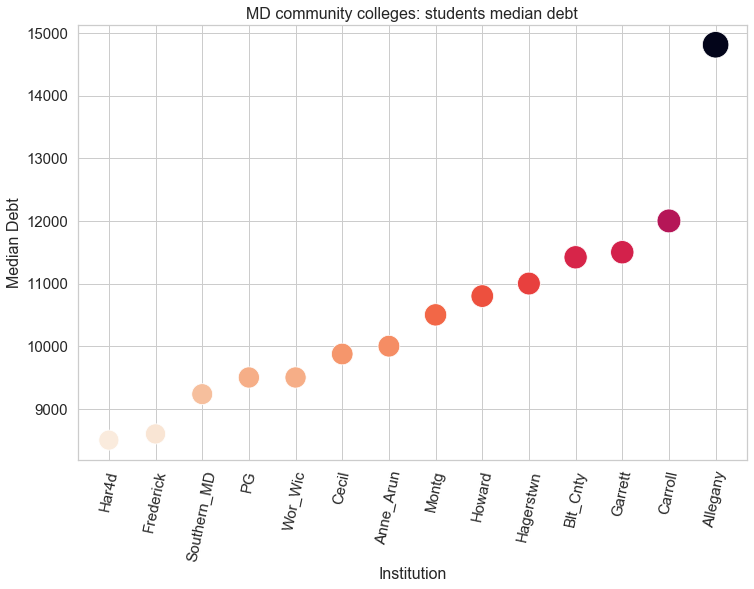

In [339]:
# Plot median debt at MD CCs
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
size = 700 * (md_comm_mdndebt.MDN_DEBT / md_comm_mdndebt.MDN_DEBT.max())
ax = sns.scatterplot(x='NAME',y='MDN_DEBT',data=md_comm_mdndebt, hue=size, s=size, palette='rocket_r',legend=False)
for item in ax.get_xticklabels():
    item.set_rotation(78)
ax.axes.set_title("MD community colleges: students median debt",fontsize=16)
ax.set_xlabel("Institution",fontsize=16)
ax.set_ylabel("Median Debt",fontsize=16)
ax.tick_params(labelsize=15)

In [301]:
# Plot without sorted values
#scatter_kws={"s": 100}
#ax = sns.lmplot(x='INST', y='GRAD_DEBT_MDN', data=md_comm_coll, palette='husl',fit_reg=False,scatter_kws={"s": 100})
#ax.set_axis_labels(x_var="Institution", y_var="Debt")
#ax.set_titles("{Median debt for those completed}")
#ax.set_xticklabels(rotation=90)
#sns.set(rc={'figure.figsize':(12,8)})
#sns.set_style("whitegrid")
#ax = sns.scatterplot(x='INST',y='GRAD_DEBT_MDN',data=md_comm_coll, s=200, legend=False)
#for item in ax.get_xticklabels():
#    item.set_rotation(78)
#ax.axes.set_title("MD community college students: median debt",fontsize=16)
#ax.set_xlabel("Institution",fontsize=16)
#ax.set_ylabel("Debt",fontsize=16)
#ax.tick_params(labelsize=15)


In [248]:
md_grad_coll[['GRAD_DEBT_MDN']]=md_grad_coll[['GRAD_DEBT_MDN']].astype('float64')

C:\Users\skpan\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [302]:
# Median debt at MD GCs
md_grad_mdndebt = pd.DataFrame(columns=['NAME', 'MDN_DEBT'])
md_grad_mdndebt[['NAME', 'MDN_DEBT']] = md_grad_coll[['GINST','GRAD_DEBT_MDN']]

In [303]:
md_grad_mdndebt=md_grad_mdndebt.sort_values('MDN_DEBT').reset_index()

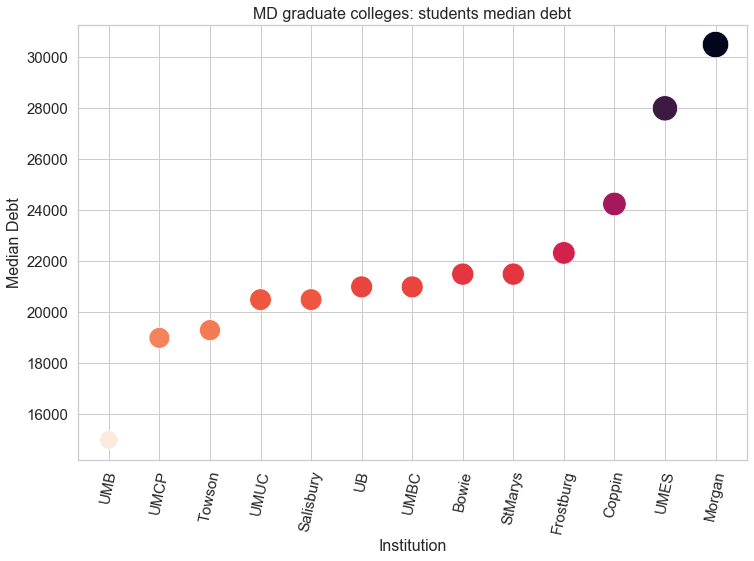

In [340]:
# Plot median debt at MD GCs
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
size = 700 * (md_grad_mdndebt.MDN_DEBT / md_grad_mdndebt.MDN_DEBT.max())
ax = sns.scatterplot(x='NAME',y='MDN_DEBT',data=md_grad_mdndebt,hue=size, s=size, palette='rocket_r', legend=False)
for item in ax.get_xticklabels():
    item.set_rotation(78)
ax.axes.set_title("MD graduate colleges: students median debt",fontsize=16)
ax.set_xlabel("Institution",fontsize=16)
ax.set_ylabel("Median Debt",fontsize=16)
ax.tick_params(labelsize=15)

In [307]:
md_comm_mdndebt.MDN_DEBT.median()

10250.0

In [308]:
md_grad_mdndebt.MDN_DEBT.median()

21000.0

In [309]:
# Plot without sorted values
#sns.set(rc={'figure.figsize':(12,8)})
#sns.set_style("whitegrid")
#ax = sns.scatterplot(x='GINST',y='GRAD_DEBT_MDN', color='turquoise',data=md_grad_coll,s=200,legend=False,edgecolor='r')
#sns.color_palette(colors)
#for item in ax.get_xticklabels():
#    item.set_rotation(78)
#ax.axes.set_title("MD graduate college students: median debt",fontsize=16)
#ax.set_xlabel("Institution",fontsize=16)
#ax.set_ylabel("Median Debt",fontsize=16)
#ax.tick_params(labelsize=15)

In [234]:
#x = np.arange(16)
#plt.figure(figsize=(10,8))
#plt.title('Median debt')
#plt.xlabel('Institution')
#plt.ylabel('Debt')
#plt.bar(x + 0.00, md_comm_coll.GRAD_DEBT_MDN, width=0.175, color='mediumblue')
#plt.xticks(x, md_comm_coll.INST, rotation=90)
#plt.show()

In [70]:
md_comm_coll[['MN_EARN_WNE_P6']]=md_comm_coll[['MN_EARN_WNE_P6']].astype('float64')
md_comm_coll[['MN_EARN_WNE_P10']]=md_comm_coll[['MN_EARN_WNE_P10']].astype('float64')

In [71]:
print(md_comm_coll.MN_EARN_WNE_P6.dtype)
print(md_comm_coll.MN_EARN_WNE_P10.dtype)

float64
float64


In [437]:
# Mean earnings at MD CCs - 6 yrs after enrollment
md_comm_earn = pd.DataFrame(columns=['NAME', 'EARN'])
md_comm_earn[['NAME', 'EARN']] = md_comm_coll[['INST','MN_EARN_WNE_P6']]

In [438]:
md_comm_earn=md_comm_earn.sort_values('EARN').reset_index()

In [442]:
md_comm_earn[['EARN']]=md_comm_earn[['EARN']].astype('float64')
print(md_comm_earn.EARN.dtype)

float64


[Text(0, 0, 'Blt_City'),
 Text(0, 0, 'Garrett'),
 Text(0, 0, 'Wor_Wic'),
 Text(0, 0, 'Chesapeake'),
 Text(0, 0, 'Allegany'),
 Text(0, 0, 'Cecil'),
 Text(0, 0, 'Hagerstwn'),
 Text(0, 0, 'Har4d'),
 Text(0, 0, 'Blt_Cnty'),
 Text(0, 0, 'Carroll'),
 Text(0, 0, 'Southern_MD'),
 Text(0, 0, 'Frederick'),
 Text(0, 0, 'PG'),
 Text(0, 0, 'Montg'),
 Text(0, 0, 'Howard'),
 Text(0, 0, 'Anne_Arun')]

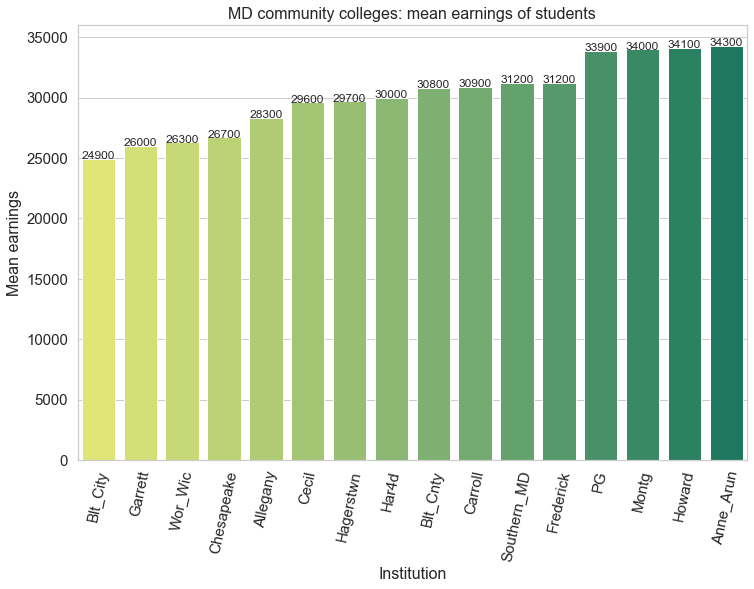

In [727]:
# Plot mean earnings at MD CCs
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
ax=sns.barplot(x='NAME', y='EARN', data=md_comm_earn, palette='summer_r')
for p in ax.patches:
    value = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_y()+p.get_height() + 0.4,
            value,
            ha="center")
ax.axes.set_title("MD community colleges: mean earnings of students",fontsize=16)
ax.set_xlabel("Institution",fontsize=16)
ax.set_ylabel("Mean earnings",fontsize=16)
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=78)

In [465]:
# Mean earnings for MD GCs
md_grad_earn = pd.DataFrame(columns=['NAME', 'EARN'])
md_grad_earn[['NAME', 'EARN']] = md_grad_coll[['GINST','MN_EARN_WNE_P6']]

In [466]:
md_grad_earn=md_grad_earn.sort_values('EARN').reset_index()

In [467]:
md_grad_earn[['EARN']]=md_grad_earn[['EARN']].astype('float64')
print(md_grad_earn.EARN.dtype)

float64


[Text(0, 0, 'UMES'),
 Text(0, 0, 'Morgan'),
 Text(0, 0, 'Coppin'),
 Text(0, 0, 'Frostburg'),
 Text(0, 0, 'Bowie'),
 Text(0, 0, 'StMarys'),
 Text(0, 0, 'Salisbury'),
 Text(0, 0, 'Towson'),
 Text(0, 0, 'UMBC'),
 Text(0, 0, 'UB'),
 Text(0, 0, 'UMUC'),
 Text(0, 0, 'UMCP'),
 Text(0, 0, 'UMB')]

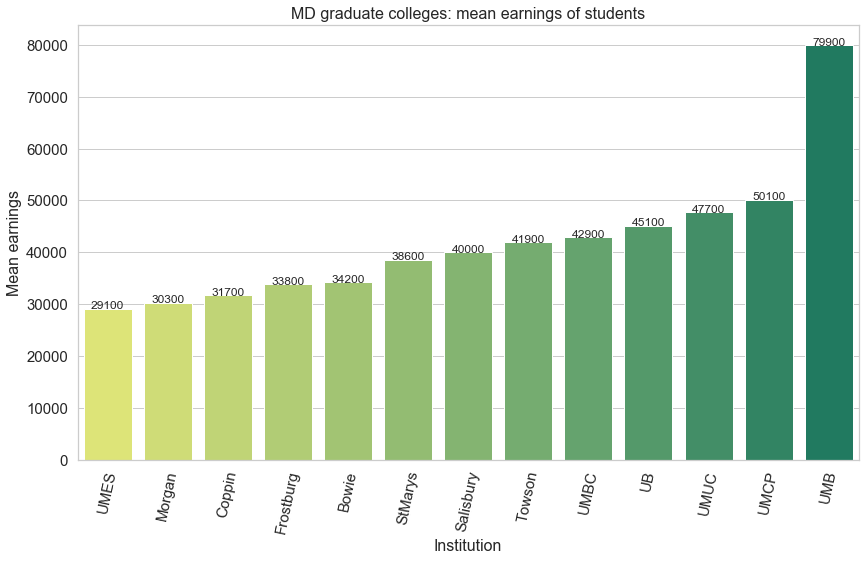

In [726]:
# Plot median earnings for MD GC graduates
sns.set(rc={'figure.figsize':(14,8)})
sns.set_style("whitegrid")
ax=sns.barplot(x='NAME', y='EARN', data=md_grad_earn, palette='summer_r')
for p in ax.patches:
    value = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_y()+p.get_height() + 0.4,
            value,
            ha="center")
ax.axes.set_title("MD graduate colleges: mean earnings of students",fontsize=16)
ax.set_xlabel("Institution",fontsize=16)
ax.set_ylabel("Mean earnings",fontsize=16)
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=78)

In [701]:
md_comm_earn.EARN.describe().transpose()

count       16.000000
mean     30118.750000
std       3058.805595
min      24900.000000
25%      27900.000000
50%      30400.000000
75%      31875.000000
max      34300.000000
Name: EARN, dtype: float64

In [704]:
comm_earn_inter = np.percentile(md_comm_earn.EARN, [2.5, 97.5])
print(comm_earn_inter)

[25312.5 34225. ]


In [702]:
md_grad_earn.EARN.describe().transpose()

count       13.000000
mean     41946.153846
std      13222.242333
min      29100.000000
25%      33800.000000
50%      40000.000000
75%      45100.000000
max      79900.000000
Name: EARN, dtype: float64

In [705]:
grad_earn_inter = np.percentile(md_grad_earn.EARN, [2.5, 97.5])
print(grad_earn_inter)

[29460. 70960.]


In [706]:
md_comm_coll[['INST','MN_EARN_WNE_P6']]

,INST,MN_EARN_WNE_P6
1447,Allegany,28300
1448,Anne_Arun,34300
1452,Blt_City,24900
1456,Cecil,29600
1457,Southern_MD,31200
1458,Chesapeake,26700
1463,Frederick,31200
1465,Garrett,26000
1468,Hagerstwn,29700
1469,Har4d,30000


In [ ]:
# MD community college students: 6_yrs_after_entry.working_not_enrolled.mean_earnings
md_comm_coll.MN_EARN_WNE_P6.describe()

In [75]:
# 10_yrs_after_entry.working_not_enrolled.mean_earnings
md_comm_coll.MN_EARN_WNE_P10.describe()

count       16.000000
mean     37687.500000
std       4948.922442
min      31200.000000
25%      33025.000000
50%      36850.000000
75%      42125.000000
max      46000.000000
Name: MN_EARN_WNE_P10, dtype: float64

In [ ]:
# MD graduate college students: 6_yrs_after_entry.working_not_enrolled.mean_earnings
md_grad_coll.MN_EARN_WNE_P6.describe()

In [ ]:
# 10_yrs_after_entry.working_not_enrolled.mean_earnings
md_grad_coll.MN_EARN_WNE_P10.describe()

In [531]:
#BIGGER_SIZE = 18
#plt.rc('xtick', labelsize=BIGGER_SIZE)
#plt.rc('ytick', labelsize=BIGGER_SIZE)
#plt.rc('axes', labelsize=BIGGER_SIZE)
#plt.rc('axes', titlesize=BIGGER_SIZE)
#plt.rc('legend', fontsize=BIGGER_SIZE)
#plt.rc('figure', titlesize=BIGGER_SIZE)
#x = np.arange(16)
#plt.figure(figsize=(14,8))
#plt.title('Mean earnings of Students who are not enrolled and working')
#plt.xlabel('Institution')
#plt.ylabel('Earnings')
#plt.bar(x + 0.00, md_comm_coll.MN_EARN_WNE_P6, width=0.2, color='brown', label='Earnings after 6yrs')
#plt.bar(x + 0.2, md_comm_coll.MN_EARN_WNE_P10, width=0.2, color='green', label='Earnings after 10yrs')
#plt.xticks(x, md_comm_coll.INST, rotation=90)
#plt.legend()
#plt.show()

In [235]:
#plt.figure(figsize=(20,10))
#plt.title('Mean earnings of Students who are not enrolled and working')
#plt.xlabel('Institution')
#plt.ylabel('Dollars')
#plt.scatter(md_comm_coll.INST, md_comm_coll.MN_EARN_WNE_P6, color='brown', s=40, label='Earnings after 6yrs')
#plt.scatter(md_comm_coll.INST, md_comm_coll.MN_EARN_WNE_P10, color='green', s=40, label='Earnings after 10yrs')
#plt.xticks(rotation=90)
#plt.legend()
#plt.show()

In [208]:
md_grad_coll[['GINST','COSTT4_A']]

,GINST,COSTT4_A
1453,UB,25951.0
1454,Bowie,20911.0
1460,Coppin,17848.0
1464,Frostburg,21220.0
1476,UMUC,18719.0
1477,UMB,NaN
1478,UMBC,24503.0
1479,UMCP,25701.0
1481,UMES,22192.0
1485,Morgan,23774.0


In [209]:
md_grad_coll[['GINST','NPT4_PUB']]

,GINST,NPT4_PUB
1453,UB,21329.0
1454,Bowie,14974.0
1460,Coppin,10675.0
1464,Frostburg,14699.0
1476,UMUC,14861.0
1477,UMB,NaN
1478,UMBC,20539.0
1479,UMCP,18517.0
1481,UMES,15860.0
1485,Morgan,16658.0


In [210]:
md_grad_coll[['GINST','GRAD_DEBT_MDN']]

,GINST,GRAD_DEBT_MDN
1453,UB,21000
1454,Bowie,21500
1460,Coppin,24250
1464,Frostburg,22331
1476,UMUC,20500
1477,UMB,15000
1478,UMBC,21000
1479,UMCP,19000
1481,UMES,28000
1485,Morgan,30500


In [236]:
#md_grad_coll[['GINST','MN_EARN_WNE_P6']]

In [237]:
#md_grad_coll[['GINST','PCTFLOAN']]

In [238]:
#md_grad_coll[['GINST','PCTPELL']]

In [281]:
# Calculate avg aid/grant for students of MD GCs
GAID_GRANT = md_grad_coll.COSTT4_A - md_grad_coll.NPT4_PUB

In [282]:
#GAID_GRANT

In [283]:
# add new column to dataframe
md_grad_coll['GAID_GRANT'] = GAID_GRANT

C:\Users\skpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [284]:
#md_grad_coll[['GINST','GAID_GRANT']]

In [285]:
md_grad_coll.GAID_GRANT.dtype

dtype('float64')

In [220]:
#print(md_grad_coll.MN_EARN_WNE_P6.dtype)
#print(md_grad_coll.GRAD_DEBT_MDN.dtype)
#print(md_grad_coll.COSTT4_A.dtype)
#print(md_grad_coll.NPT4_PUB.dtype)

object
object
float64
float64


In [286]:
md_grad_coll[['MN_EARN_WNE_P6']]=md_grad_coll[['MN_EARN_WNE_P6']].astype('float64')

In [287]:
md_grad_coll[['GRAD_DEBT_MDN']]=md_grad_coll[['GRAD_DEBT_MDN']].astype('float64')

In [288]:
#print(md_grad_coll.MN_EARN_WNE_P6.dtype)
#print(md_grad_coll.GRAD_DEBT_MDN.dtype)

In [289]:
md_grad_aidgrant = pd.DataFrame(columns=['NAME', 'AID_GRANT'])
md_grad_aidgrant[['NAME', 'AID_GRANT']] = md_grad_coll[['GINST','GAID_GRANT']]

In [290]:
md_grad_aidgrant=md_grad_aidgrant.sort_values('AID_GRANT').reset_index()

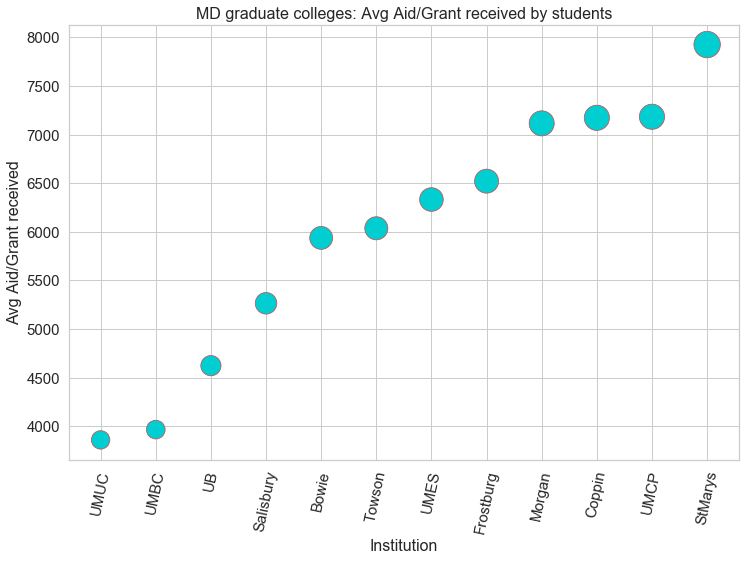

In [318]:
# Plot avg aid/grant at MD GCs
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
size = 700 * (md_grad_aidgrant.AID_GRANT / md_grad_aidgrant.AID_GRANT.max())
ax = sns.scatterplot(x='NAME',y='AID_GRANT', color='darkturquoise',data=md_grad_aidgrant, s=size, legend=False,edgecolor='r')
sns.color_palette(colors)
for item in ax.get_xticklabels():
    item.set_rotation(78)
ax.axes.set_title("MD graduate colleges: Avg Aid/Grant received by students",fontsize=16)
ax.set_xlabel("Institution",fontsize=16)
ax.set_ylabel("Avg Aid/Grant received",fontsize=16)
ax.tick_params(labelsize=15)

In [710]:
md_grad_coll.GAID_GRANT.describe().transpose()

count      12.000000
mean     5994.500000
std      1324.495684
min      3858.000000
25%      5103.500000
50%      6184.000000
75%      7130.250000
max      7927.000000
Name: GAID_GRANT, dtype: float64

In [296]:
#md_grad_coll[['GINST','GAID_GRANT']]

,GINST,GAID_GRANT
1453,UB,4622.0
1454,Bowie,5937.0
1460,Coppin,7173.0
1464,Frostburg,6521.0
1476,UMUC,3858.0
1477,UMB,NaN
1478,UMBC,3964.0
1479,UMCP,7184.0
1481,UMES,6332.0
1485,Morgan,7116.0


In [297]:
#sns.set(rc={'figure.figsize':(12,8)})
#ax=sns.barplot(x=md_grad_coll.GINST, y=md_grad_coll.GAID_GRANT)
#for item in ax.get_xticklabels():
#    item.set_rotation(90)
#ax.axes.set_title("Avg Aid/Grant received per year by students in Grad colleges",fontsize=16)
#ax.set_xlabel("Institution",fontsize=16)
#ax.set_ylabel("Avg Aid/Grant received",fontsize=16)
#ax.tick_params(labelsize=15)

In [231]:
md_grad_coll.GAID_GRANT.describe()

count      12.000000
mean     5994.500000
std      1324.495684
min      3858.000000
25%      5103.500000
50%      6184.000000
75%      7130.250000
max      7927.000000
Name: GAID_GRANT, dtype: float64

In [713]:
md_comm_aidgrant = pd.DataFrame(columns=['NAME', 'AID_GRANT'])
md_comm_aidgrant[['NAME', 'AID_GRANT']] = md_comm_coll[['INST','AID_GRANT']]

In [714]:
md_comm_aidgrant = md_comm_aidgrant.sort_values('AID_GRANT').reset_index()

[Text(0, 0, 'Anne_Arun'),
 Text(0, 0, 'Hagerstwn'),
 Text(0, 0, 'Har4d'),
 Text(0, 0, 'Cecil'),
 Text(0, 0, 'Carroll'),
 Text(0, 0, 'Frederick'),
 Text(0, 0, 'PG'),
 Text(0, 0, 'Wor_Wic'),
 Text(0, 0, 'Southern_MD'),
 Text(0, 0, 'Blt_Cnty'),
 Text(0, 0, 'Howard'),
 Text(0, 0, 'Garrett'),
 Text(0, 0, 'Allegany'),
 Text(0, 0, 'Chesapeake'),
 Text(0, 0, 'Montg'),
 Text(0, 0, 'Blt_City')]

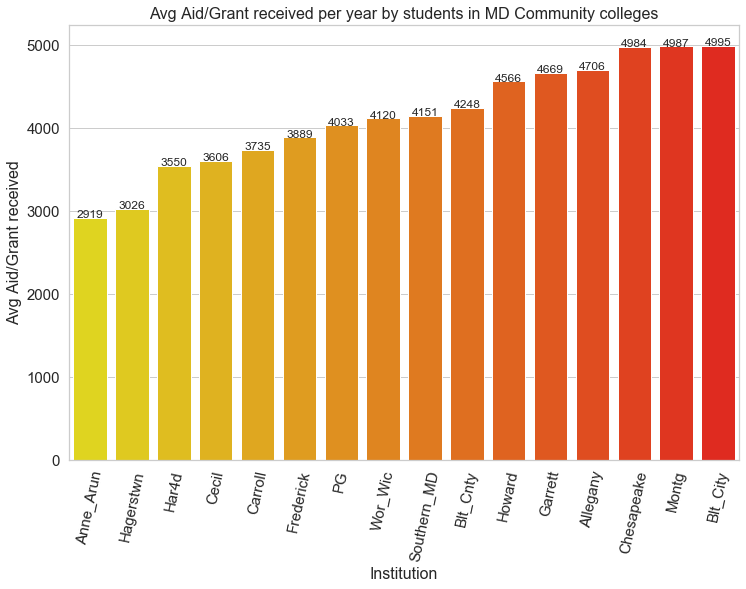

In [724]:
# Plot avg aid/grant at MD CCs
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
ax=sns.barplot(x='NAME', y='AID_GRANT', data=md_comm_aidgrant, palette='autumn_r')
for p in ax.patches:
    value = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_y()+p.get_height() + 0.4,
            value,
            ha="center")
ax.axes.set_title("Avg Aid/Grant received per year by students in MD Community colleges",fontsize=16)
ax.set_xlabel("Institution",fontsize=16)
ax.set_ylabel("Avg Aid/Grant received",fontsize=16)
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=78)

In [725]:
# Plot avg aid/grant at MD CCs
#sns.set(rc={'figure.figsize':(12,8)})
#ax=sns.barplot(x=md_comm_coll.INST, y=md_comm_coll.AID_GRANT)
#for p in ax.patches:
#    value = int(p.get_height())
#    ax.text(p.get_x() + p.get_width() / 2,
#            p.get_y()+p.get_height() + 0.2,
#            value,
#            ha="center")
#for item in ax.get_xticklabels():
#    item.set_rotation(78)
#ax.axes.set_title("Avg Aid/Grant received per year by students in Community colleges",fontsize=16)
#ax.set_xlabel("Institution",fontsize=16)
#ax.set_ylabel("Avg Aid/Grant received",fontsize=16)
#ax.tick_params(labelsize=15)

In [240]:
md_comm_coll.AID_GRANT.describe()

count      16.00000
mean     4136.50000
std       661.21101
min      2919.00000
25%      3702.75000
50%      4135.50000
75%      4678.25000
max      4995.00000
Name: AID_GRANT, dtype: float64

In [239]:
#md_comm_coll[['INST','GRAD_DEBT_MDN']]

In [240]:
#md_comm_coll[['INST','MN_EARN_WNE_P6']]

In [374]:
md_comm_debtearn = pd.DataFrame(columns=['NAME', 'MDN_DEBT', 'NET_PRICE', 'EARN_P6'])
md_comm_debtearn[['NAME','MDN_DEBT','NET_PRICE','EARN_P6']] = md_comm_coll[['INST','GRAD_DEBT_MDN','NPT4_PUB','MN_EARN_WNE_P6']]
#print(md_comm_debtearn.shape)
#print(md_comm_debtearn.DEBT_MDN.dtype)
#print(md_comm_debtearn.EARN_P6.dtype)


In [375]:
md_comm_debtearn[['EARN_P6']]=md_comm_debtearn[['EARN_P6']].astype('float64')

In [378]:
#print(md_comm_debtearn.MDN_DEBT.dtype)
#print(md_comm_debtearn.NET_PRICE.dtype)

In [363]:
#md_comm_debtearn=md_comm_debtearn.sort_values(['EARN_P6','MDN_DEBT']).reset_index()

In [379]:
md_comm_debtearn = pd.melt(md_comm_debtearn, id_vars = "NAME")
#print(md_comm_debtearn.head(5))

In [380]:
md_comm_debtearn=md_comm_debtearn.sort_values('value').reset_index()

[Text(0, 0, 'Allegany'),
 Text(0, 0, 'Anne_Arun'),
 Text(0, 0, 'Blt_City'),
 Text(0, 0, 'Cecil'),
 Text(0, 0, 'Southern_MD'),
 Text(0, 0, 'Chesapeake'),
 Text(0, 0, 'Frederick'),
 Text(0, 0, 'Garrett'),
 Text(0, 0, 'Hagerstwn'),
 Text(0, 0, 'Har4d'),
 Text(0, 0, 'Howard'),
 Text(0, 0, 'Montg'),
 Text(0, 0, 'PG'),
 Text(0, 0, 'Wor_Wic'),
 Text(0, 0, 'Carroll'),
 Text(0, 0, 'Blt_Cnty')]

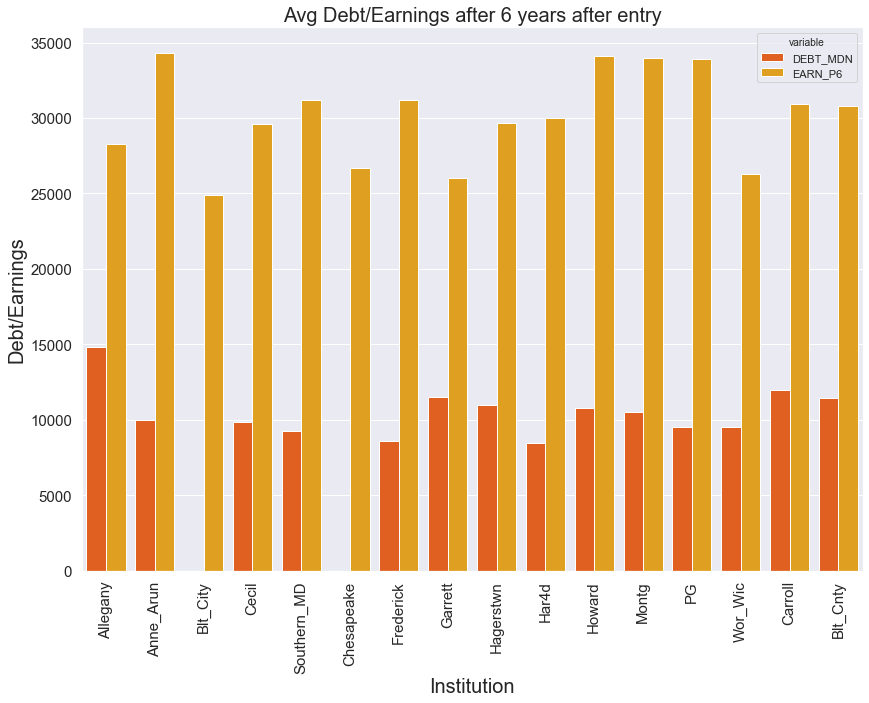

In [252]:
# Plot debt vs earnings for MD CC graduates
sns.set(rc={'figure.figsize':(14,10)})
ax=sns.barplot(x='NAME', y='value', hue='variable', data=md_comm_debtearn, palette='autumn')
ax.axes.set_title("Avg Debt/Earnings for MD community college students 6 years after entry",fontsize=20)
ax.set_xlabel("Institution",fontsize=20)
ax.set_ylabel("Debt/Earnings",fontsize=20)
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

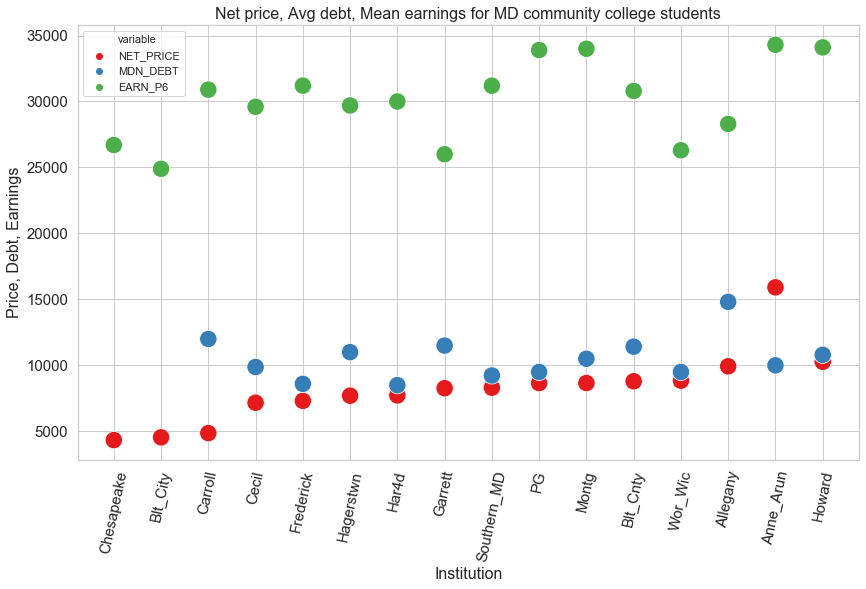

In [429]:
# Plot Net price, debt, and Mean earnings for MD CC graduates
sns.set(rc={'figure.figsize':(14,8)})
sns.set_style("whitegrid")
ax = sns.scatterplot(x='NAME', y='value',hue='variable',palette='Set1',data=md_comm_debtearn,s=300)
for item in ax.get_xticklabels():
    item.set_rotation(78)
ax.axes.set_title("Net price, Avg debt, Mean earnings for MD community college students",fontsize=16)
ax.set_xlabel("Institution",fontsize=16)
ax.set_ylabel("Price, Debt, Earnings",fontsize=16)
ax.tick_params(labelsize=15)


In [430]:
print(md_grad_coll.GRAD_DEBT_MDN.dtype)
print(md_grad_coll.NPT4_PUB.dtype)
print(md_grad_coll.MN_EARN_WNE_P6.dtype)

float64
float64
float64


In [431]:
md_grad_pridbtern = pd.DataFrame(columns=['NAME', 'MDN_DEBT', 'NET_PRICE', 'EARN_P6'])
md_grad_pridbtern[['NAME','MDN_DEBT','NET_PRICE','EARN_P6']] = md_grad_coll[['GINST','GRAD_DEBT_MDN','NPT4_PUB','MN_EARN_WNE_P6']]

In [432]:
md_grad_pridbtern = pd.melt(md_grad_pridbtern, id_vars = "NAME")

In [433]:
md_grad_pridbtern=md_grad_pridbtern.sort_values('value').reset_index()

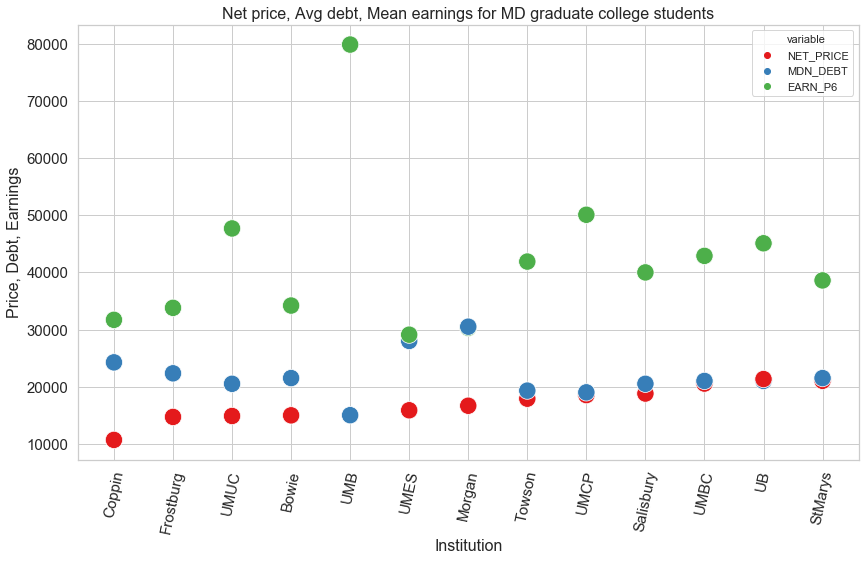

In [434]:
# Plot Net price, debt, and Mean earnings for MD GC graduates
sns.set(rc={'figure.figsize':(14,8)})
sns.set_style("whitegrid")
ax = sns.scatterplot(x='NAME', y='value',hue='variable',palette='Set1',data=md_grad_pridbtern,s=300)
for item in ax.get_xticklabels():
    item.set_rotation(78)
ax.axes.set_title("Net price, Avg debt, Mean earnings for MD graduate college students",fontsize=16)
ax.set_xlabel("Institution",fontsize=16)
ax.set_ylabel("Price, Debt, Earnings",fontsize=16)
ax.tick_params(labelsize=15)

In [436]:
md_grad_coll[['GINST','NPT4_PUB','GRAD_DEBT_MDN','MN_EARN_WNE_P6']]

,GINST,NPT4_PUB,GRAD_DEBT_MDN,MN_EARN_WNE_P6
1453,UB,21329.0,21000.0,45100.0
1454,Bowie,14974.0,21500.0,34200.0
1460,Coppin,10675.0,24250.0,31700.0
1464,Frostburg,14699.0,22331.0,33800.0
1476,UMUC,14861.0,20500.0,47700.0
1477,UMB,NaN,15000.0,79900.0
1478,UMBC,20539.0,21000.0,42900.0
1479,UMCP,18517.0,19000.0,50100.0
1481,UMES,15860.0,28000.0,29100.0
1485,Morgan,16658.0,30500.0,30300.0


In [730]:
md_grad_coll.NPT4_PUB.describe().transpose()

count       12.000000
mean     17151.833333
std       3146.362050
min      10675.000000
25%      14945.750000
50%      17275.500000
75%      19228.750000
max      21329.000000
Name: NPT4_PUB, dtype: float64

In [731]:
md_grad_coll.GRAD_DEBT_MDN.describe().transpose()

count       13.000000
mean     21875.615385
std       3931.710136
min      15000.000000
25%      20500.000000
50%      21000.000000
75%      22331.000000
max      30500.000000
Name: GRAD_DEBT_MDN, dtype: float64

In [732]:
md_grad_coll.MN_EARN_WNE_P6.describe().transpose()

count       13.000000
mean     41946.153846
std      13222.242333
min      29100.000000
25%      33800.000000
50%      40000.000000
75%      45100.000000
max      79900.000000
Name: MN_EARN_WNE_P6, dtype: float64

In [485]:
md_comm_coll = md_comm_coll.replace({'FIRSTGEN_DEBT_MDN':'PrivacySuppressed'},np.NaN)
md_comm_coll[['FIRSTGEN_DEBT_MDN']]=md_comm_coll[['FIRSTGEN_DEBT_MDN']].astype('float64')

In [486]:
md_comm_debt = pd.DataFrame(columns=['NAME', 'MDN_DEBT', 'FIRSTGEN_DEBT', 'PELL_DEBT'])
md_comm_debt[['NAME','MDN_DEBT','FIRSTGEN_DEBT', 'PELL_DEBT']] = md_comm_coll[['INST','GRAD_DEBT_MDN','FIRSTGEN_DEBT_MDN','PELL_DEBT_MDN']]

In [487]:
print(md_comm_debt.MDN_DEBT.dtype)
print(md_comm_debt.FIRSTGEN_DEBT.dtype)
print(md_comm_debt.PELL_DEBT.dtype)

float64
float64
float64


In [488]:
md_comm_debt = pd.melt(md_comm_debt, id_vars = "NAME")

In [490]:
md_comm_debt=md_comm_debt.sort_values('value').reset_index()

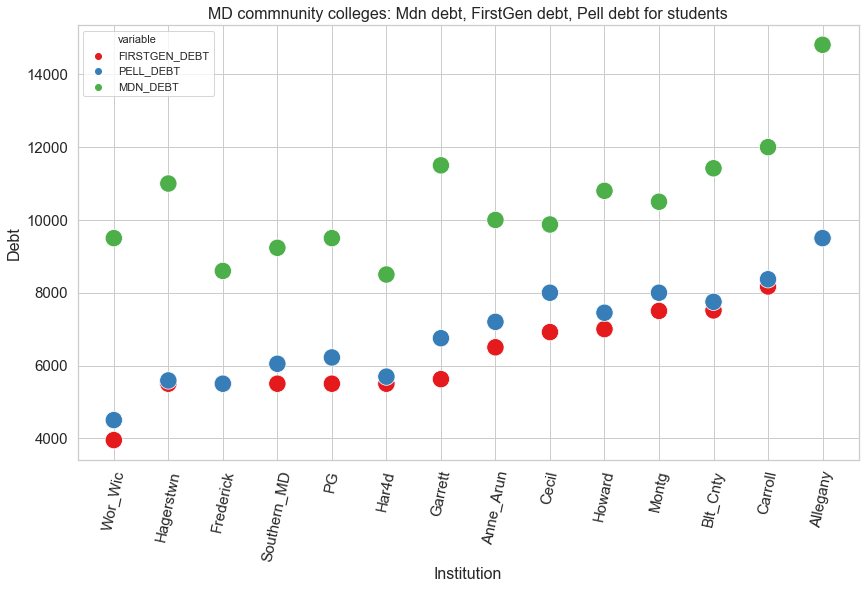

In [496]:
# Plot Mdn debt, firstGen debt, debt for students who received Pell grants for MD CC graduates
sns.set(rc={'figure.figsize':(14,8)})
sns.set_style("whitegrid")
ax = sns.scatterplot(x='NAME', y='value',hue='variable',palette='Set1',data=md_comm_debt,s=300)
for item in ax.get_xticklabels():
    item.set_rotation(78)
ax.axes.set_title("MD commnunity colleges: Mdn debt, FirstGen debt, Pell debt for students",fontsize=16)
ax.set_xlabel("Institution",fontsize=16)
ax.set_ylabel("Debt",fontsize=16)
ax.tick_params(labelsize=15)

In [494]:
# Median debt for Firstgen students at MD community colleges
md_comm_coll.FIRSTGEN_DEBT_MDN.median()

6062.5

In [259]:
md_comm_aiddebt = pd.DataFrame(columns=['NAME', 'AID_GRANT', 'DEBT_MDN'])
md_comm_aiddebt[['NAME', 'AID_GRANT', 'DEBT_MDN']] = md_comm_coll[['INST','AID_GRANT','GRAD_DEBT_MDN']]
print(md_comm_aiddebt.shape)
print(md_comm_aiddebt.AID_GRANT.dtype)
print(md_comm_aiddebt.DEBT_MDN.dtype)

(16, 3)
float64
float64


In [260]:
md_comm_aiddebt = pd.melt(md_comm_aiddebt, id_vars = "NAME")
print(md_comm_aiddebt.head(5))

          NAME   variable   value
0     Allegany  AID_GRANT  4706.0
1    Anne_Arun  AID_GRANT  2919.0
2     Blt_City  AID_GRANT  4995.0
3        Cecil  AID_GRANT  3606.0
4  Southern_MD  AID_GRANT  4151.0


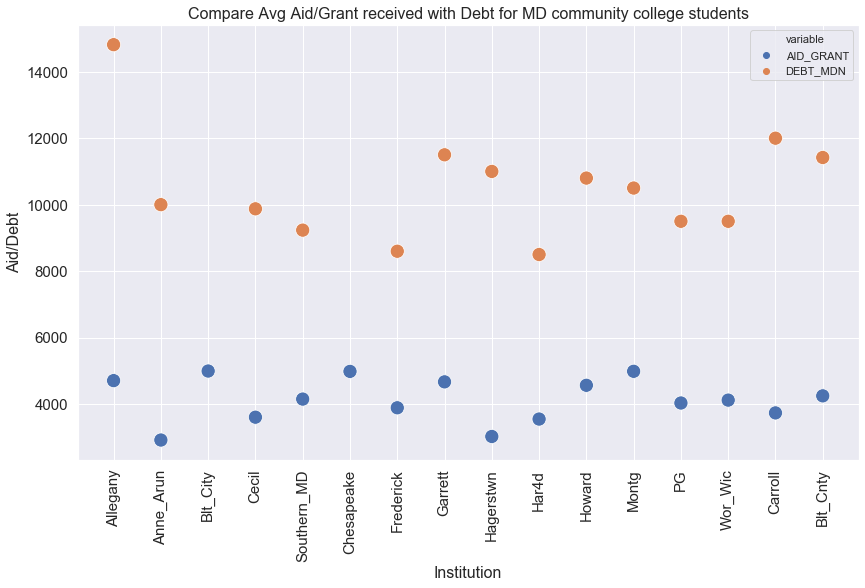

In [261]:
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.scatterplot(x='NAME', y='value', hue='variable', data=md_comm_aiddebt,s=200)
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.axes.set_title("Compare Avg Aid/Grant received with Debt for MD community college students",fontsize=16)
ax.set_xlabel("Institution",fontsize=16)
ax.set_ylabel("Aid/Debt",fontsize=16)
ax.tick_params(labelsize=15)

In [478]:
md_comm_coll[["INST", "GRAD_DEBT_MDN", "FIRSTGEN_DEBT_MDN", "PELL_DEBT_MDN", "NOPELL_DEBT_MDN"]]

,INST,GRAD_DEBT_MDN,FIRSTGEN_DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN
1447,Allegany,14813.0,9500,9500.0,8240.0
1448,Anne_Arun,10000.0,6500,7200.0,5500.0
1452,Blt_City,NaN,PrivacySuppressed,NaN,NaN
1456,Cecil,9875.0,6918,8000.0,6000.0
1457,Southern_MD,9234.0,5500,6048.0,5500.0
1458,Chesapeake,NaN,PrivacySuppressed,NaN,NaN
1463,Frederick,8599.0,5500,5500.0,5500.0
1465,Garrett,11500.0,5625,6750.0,5500.0
1468,Hagerstwn,11000.0,5500,5589.0,5500.0
1469,Har4d,8500.0,5500,5694.0,5500.0


In [570]:
md_comm_coll[["INST", "TUITIONFEE_IN", "TUITIONFEE_OUT", "AVGFACSAL"]]

,INST,TUITIONFEE_IN,TUITIONFEE_OUT,AVGFACSAL
1447,Allegany,3940.0,8620.0,5954.0
1448,Anne_Arun,4646.0,12566.0,7501.0
1452,Blt_City,3074.0,7154.0,6672.0
1456,Cecil,4005.0,8265.0,6532.0
1457,Southern_MD,3690.0,8266.0,8280.0
1458,Chesapeake,3818.0,7328.0,6848.0
1463,Frederick,3520.0,9160.0,6908.0
1465,Garrett,3948.0,8568.0,6079.0
1468,Hagerstwn,3616.0,6918.0,6094.0
1469,Har4d,3643.0,7902.0,6291.0


In [684]:
md_grad_coll[["GINST", "TUITIONFEE_IN", "TUITIONFEE_OUT", "AVGFACSAL"]]

,GINST,TUITIONFEE_IN,TUITIONFEE_OUT,AVGFACSAL
1453,UB,8824.0,20704.0,10431.0
1454,Bowie,8064.0,18653.0,8561.0
1460,Coppin,7474.0,13622.0,7680.0
1464,Frostburg,8914.0,22262.0,6991.0
1476,UMUC,7296.0,12336.0,6279.0
1477,UMB,NaN,NaN,11251.0
1478,UMBC,11518.0,25654.0,9982.0
1479,UMCP,10399.0,33606.0,13017.0
1481,UMES,8042.0,18048.0,8235.0
1485,Morgan,7766.0,17832.0,8799.0


In [639]:
md_coll_facusal=pub_coll.ix[((pub_coll['STABBR'] == 'MD') & ((pub_coll['HIGHDEG'] == 4) | (pub_coll['HIGHDEG'] == 2))), ['HIGHDEG', 'AVGFACSAL']]

C:\Users\skpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [641]:
md_coll_facusal = pd.melt(md_coll_facusal, id_vars = "HIGHDEG")

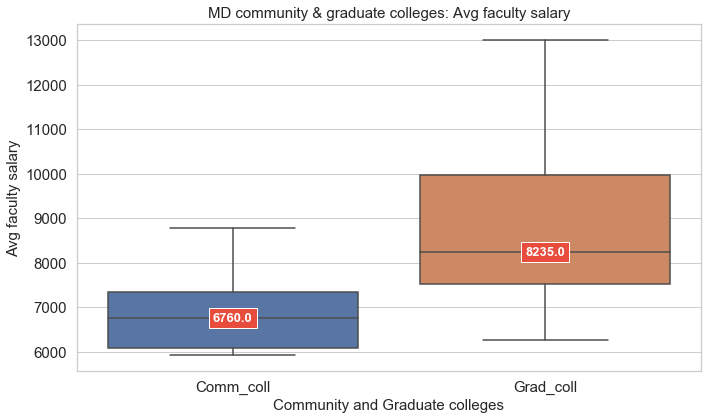

In [669]:
# Comparison plot for median avg salary for faculty at MD CC and GCs
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")
box_plot=sns.boxplot(x='HIGHDEG', y='value', data=md_coll_facusal)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=13,
        color='white',
        bbox=dict(facecolor='#e74c3c'))
labels = [item.get_text() for item in box_plot.get_xticklabels()]
labels[0] = 'Comm_coll'
labels[1] = 'Grad_coll'
box_plot.set_xticklabels(labels)
box_plot.axes.set_title("MD community & graduate colleges: Avg faculty salary",fontsize=15)
box_plot.set_xlabel("Community and Graduate colleges",fontsize=15)
box_plot.set_ylabel("Avg faculty salary",fontsize=15)
box_plot.tick_params(labelsize=15)
box_plot.figure.tight_layout()

In [692]:
md_coll_facusal.groupby('HIGHDEG').value.describe().transpose()

HIGHDEG,2,4
count,16.000000,13.000000
mean,6858.875000,8778.692308
std,851.561615,1903.007111
min,5923.000000,6279.000000
25%,6090.250000,7517.000000
50%,6760.000000,8235.000000
75%,7352.750000,9982.000000
max,8782.000000,13017.000000


In [647]:
md_coll_tuitionin=pub_coll.ix[((pub_coll['STABBR'] == 'MD') & ((pub_coll['HIGHDEG'] == 4) | (pub_coll['HIGHDEG'] == 2))), ['HIGHDEG', 'TUITIONFEE_IN']]

C:\Users\skpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [648]:
md_coll_tuitionin = pd.melt(md_coll_tuitionin, id_vars = "HIGHDEG")


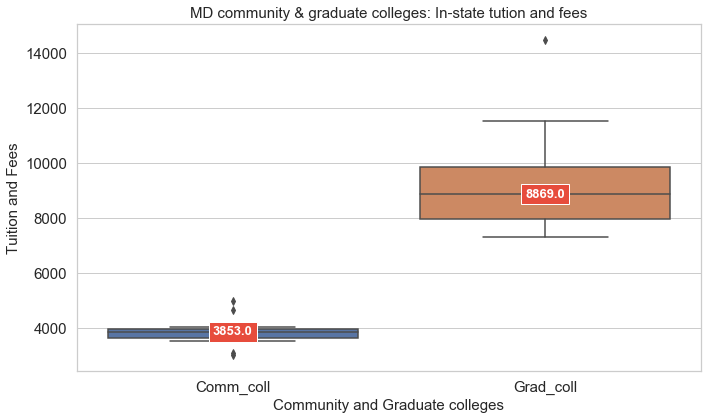

In [668]:
# Comparison plot for median In-state tuition and fee at MD CC and GCs
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")
box_plot=sns.boxplot(x='HIGHDEG', y='value', data=md_coll_tuitionin)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=13,
        color='white',
        bbox=dict(facecolor='#e74c3c'))
labels = [item.get_text() for item in box_plot.get_xticklabels()]
labels[0] = 'Comm_coll'
labels[1] = 'Grad_coll'
box_plot.set_xticklabels(labels)
box_plot.axes.set_title("MD community & graduate colleges: In-state tution and fees",fontsize=15)
box_plot.set_xlabel("Community and Graduate colleges",fontsize=15)
box_plot.set_ylabel("Tuition and Fees",fontsize=15)
box_plot.tick_params(labelsize=15)
box_plot.figure.tight_layout()

In [690]:
md_coll_tuitionin.groupby('HIGHDEG').value.describe().transpose()

HIGHDEG,2,4
count,16.000000,12.000000
mean,3841.312500,9339.083333
std,485.523459,2056.728446
min,3000.000000,7296.000000
25%,3636.250000,7973.000000
50%,3853.000000,8869.000000
75%,3962.250000,9870.250000
max,4974.000000,14496.000000


In [675]:
md_coll_tuitionin.groupby('HIGHDEG').value.describe()

,count,mean,std,min,25%,50%,75%,max
HIGHDEG,,,,,,,,
2,16.0,3841.312500,485.523459,3000.0,3636.25,3853.0,3962.25,4974.0
4,12.0,9339.083333,2056.728446,7296.0,7973.00,8869.0,9870.25,14496.0


In [685]:
md_grad_coll.TUITIONFEE_IN.dtype

dtype('float64')

In [688]:
# Calculate 95% confidence intervals for In-state tution and fee 
commin_conf_inter = np.percentile(md_comm_coll.TUITIONFEE_IN, [2.5, 97.5])
commout_conf_inter = np.percentile(md_comm_coll.TUITIONFEE_OUT, [2.5, 97.5])
print(commin_conf_inter)
print(commout_conf_inter)

[3027.75 4851.  ]
[ 6933.75 12906.  ]


In [689]:
gradin_conf_inter = np.nanpercentile(md_grad_coll.TUITIONFEE_IN, [2.5, 97.5])
gradout_conf_inter = np.nanpercentile(md_grad_coll.TUITIONFEE_OUT, [2.5, 97.5])
print(gradin_conf_inter)
print(gradout_conf_inter)

[ 7344.95 13677.05]
[12689.65 32600.05]


In [658]:
md_coll_tuitionout=pub_coll.ix[((pub_coll['STABBR'] == 'MD') & ((pub_coll['HIGHDEG'] == 4) | (pub_coll['HIGHDEG'] == 2))), ['HIGHDEG', 'TUITIONFEE_OUT']]

C:\Users\skpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [659]:
md_coll_tuitionout = pd.melt(md_coll_tuitionout, id_vars = "HIGHDEG")

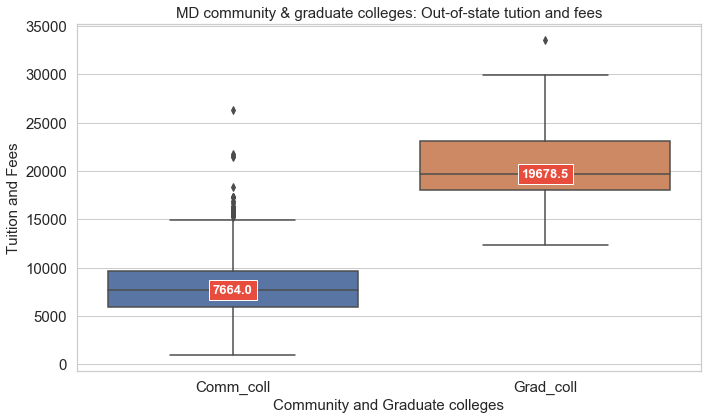

In [667]:
# Comparison plot for median Out-of-state tuition and fee at MD CC and GCs
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")
box_plot=sns.boxplot(x='HIGHDEG', y='value', data=md_comm_tuitionout)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=13,
        color='white',
        bbox=dict(facecolor='#e74c3c'))
labels = [item.get_text() for item in box_plot.get_xticklabels()]
labels[0] = 'Comm_coll'
labels[1] = 'Grad_coll'
box_plot.set_xticklabels(labels)
box_plot.axes.set_title("MD community & graduate colleges: Out-of-state tution and fees",fontsize=15)
box_plot.set_xlabel("Community and Graduate colleges",fontsize=15)
box_plot.set_ylabel("Tuition and Fees",fontsize=15)
box_plot.tick_params(labelsize=15)
box_plot.figure.tight_layout()

In [691]:
md_coll_tuitionout.groupby('HIGHDEG').value.describe().transpose()

HIGHDEG,2,4
count,16.000000,12.000000
mean,8693.812500,21118.916667
std,1840.801935,6200.157058
min,6918.000000,12336.000000
25%,7484.000000,17994.000000
50%,8265.500000,19678.500000
75%,8755.000000,23110.000000
max,13110.000000,33606.000000


In [ ]:
md_comm_facsal=pub_coll[(pub_coll.STABBR == 'MD') & 
                         (colleges.HIGHDEG == 4) | (colleges.HIGHDEG == 2), ['AVGFACSAL']]

In [568]:
print(md_comm_coll.AVGFACSAL.median())
print(md_grad_coll.AVGFACSAL.median())

6760.0
8235.0


In [569]:
print(md_comm_coll.TUITIONFEE_IN.median())
print(md_grad_coll.TUITIONFEE_IN.median())

3853.0
8869.0


In [712]:
#md_grad_coll[["GINST", "TUITIONFEE_IN", "AVGFACSAL"]]